### Titulo:
# MODELOS DE MACHINE LEARNING OPTIMIZADOS PARA PREDICCION DE MATRICULAS:
#### CASO PROGRAMA DE GEOLOGIA

### Resumen:

En un contexto de incertidumbre económica desatado por la reciente pandemia de COVID-19 y cambios significativos en las tendencias políticas globales, el número de estudiantes que ingresan a cursar estudios universitarios se ha reducido considerablemente. Las instituciones de educación superior observan con preocupación esta disminución en el número de matriculados y anticipan un impacto financiero significativo. Es urgente adaptarse a esta nueva situación, por lo que en este estudio hemos probado diferentes modelos de Machine Learning que nos permitan predecir si un Inscrito al programa de Geología se matriculará, utilizando la información recopilada en el formulario de inscripciones institucional. Evaluamos modelos de Regresión Logística, SVM, RandomForest y Naive Bayes, utilizando K-Fold Cross Validation de 5 pliegues. Además, probamos el método de optimización de Algoritmos Genéticos (GA) para tratar de aumentar la precisión de nuestros modelos. Sin embargo, los resultados obtenidos no han sido tan alentadores como esperábamos, lo que nos invita a replantear la metodología aplicada.

## 1. ANTECEDENTES -REVISION BIBLIOGRAFICA

**ARTICULO #1**

---------

**A Machine Learning Modeling Prediction of Enrollment among Admitted College Applicants at University of Santo Tomas** [ver aqui](https://web.archive.org/web/20220826003333id_/https://aip.scitation.org/doi/pdf/10.1063/5.0100174)

* Usaron informacion del *formulario de admision* y de la *prueba de admision*
* Aplicantes de los ultimos *5 años*
* Ignoraron datos que no aportan ningun valor a la predicción
* No se consideraron aquellos con poca información
* Utilizaron *23 variables predictoras* y *1 variable objetivo*
* *3 numéricas* y *19 nominales*

* **SPLIT**
  Ordenado temporalmente:

    * Del 2014 al 2018 + 20% del 2019 fue usado para Training-Validation
    * Dentro de esta data el split fue 70/30 para training y validaciones
    * El 80% restante del 2019 lo usaron para testing.


* La variable objetivo es categorica binaria: `Enrolled`, ` Nor Enrolled`
* Utilizaron:

  1. Artificial Neural Network
  2. Bayesian Network
  3. Decision Tree
  4. Logistic Regression

 Metricas:
 * accuracy
 * sensitivity
 * specificity
 * precision
 * negative predictive value

 Mejor modelo:  **Naïve Bayes** (Accu: 99.98%)

 **RESTRICCIONES:** La distribución de los matriculados y no matriculados esta restringida por confidencialidad.

**ARTICULO #2**

-----

**Maximizing University Enrollment Using Institutional-Based Aid Scholarship** [Leer aqui](https://github.com/gbuvoli/DS_Final_project/blob/4efd76774e9905803cc4ead77b582154eda3ee1f/Maximizing_University_Enrollment_Using_Institutional-Based_Aid_Scholarship.pdf)

Usaron:

  * Estudiantes admitidos 2011-2018
  * 54678 Filas
  * 15 Features (Genero, raza, GPA, Ingresos, Fecha de aplicacion, Dinero de Beca, nivel educativo de los padres)
  * Datos sesgados (58%/42%)

**MODELOS**:

  * Logistic regression (LR),
  * Support vector machines (SVMs)
  * Bayesian networks (BNs). (para visualizar las relaciones)

  ** VALIDACION**

  * K-fold Crossvalidation cv=10

**OPTIMIZACION**:

  * Genetic algorithm optimization method (GA), **una vez para cada modelo.**

      * inicial_population=100
      * max_generations=300
      * crossover=0.8
      * mutations=1.0

**Condicion** : aumento de financiacion de 0 a 1500




<p align="Center">

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/art2b.JPG?raw=true" width="40%" height="400" align="Center" />

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/art2.JPG?raw=true" width="45%" height="500" align="Center" />

&nbsp;
</p>

**ARTICULO #3**

-----

**Enhanced Dermatoscopic Skin Lesion Classification using Machine Learning Techniques** [Leer aqui](https://github.com/gbuvoli/DS_Final_project/blob/4efd76774e9905803cc4ead77b582154eda3ee1f/Enhanced_Dermatoscopic_Skin_Lesion_Classification_using_Machine_Learning_Techniques.pdf)

Usaron:

* TECNICA SMOTE (para balancer el dataset)

* **MODELOS**
  1. Naïve Bayes,
  2. Logistic Regression
  3. Decision Tree classifier (Gini index and Entropy)
  4. Support Vector Machine (all possible kernels)
  5. XGBoost



<p align="Center">

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/image1_enhanced_dermatoscopic.jpg?raw=true" width="35%" height="600" align="Center" />

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/img2_dataset.jpg?raw=true" width="60%" height="600" align="Center" />

&nbsp;

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/Results.jpg?raw=true" width="90%" height="800"  align="Center" />

</p>

## 2. METODOLOGIA DEL PROYECTO

<p align="Center">

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/OBJETIVOS.jpg?raw=true" />

</p>


<p align="Center">

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/myproject1.jpg?raw=true" />

</p>




<p align="Center">

<img src="https://github.com/gbuvoli/DS_Final_project/blob/main/VARIABLES.jpg?raw=true" />

</p>


## 3. RESULTADOS

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### FEATURE ENGINEERING - EDA

In [296]:
#Las siguientes columnas se eliminarán del dataset por proteccion de datos personales.
personal_info = ['AIDM', 'ID_WEB', 'PIDM', 'PERIODO', 'NUM_SOLICITUD', 'APELLIDOS', 'PRIMER_NOMBRE', 'SEGUNDO_NOMBRE', 'FECHA_NACIMIENTO', 'TIPO_DOCUMENTO', 'No_DOCUMENTO', 'LUGAR_EXPEDICION', 'FECHA_EXPEDICION', 'DESC_DIRECCION_1', 'DIRECCION1_LINEA1', 'DIRECCION1_LINEA2', 'DIRECCION1_LINEA3', 'TEL_PERMANENTE', 'CELULAR', 'TEL_CASA_ACUDIENTE', 'TEL1_OFICINA', 'EMAIL_PARTICULAR', 'EMAIL_UNINORTE', 'NIVEL', 'DESC_ESTADO_SOLICITUD', 'FECHA_ESTADO_SOLICITUD', 'TIPO_ADMISION', 'DESC_TIPO_ADMISION', 'DESC_TIPO_ESTUDIANTE', 'PERIODO_CATALOGO', 'PROGRAMA1', 'Div1', 'ESPECIALIDAD1_1', 'ESPECIALIDAD2_1', 'SEGUNDA_OPCION', 'PROGRAMA2_SGASTDN', 'DESC_PROGRAMA2_SGASTDN', 'COD_BACHILLERATO', 'SNP', 'ESPECIALIDAD_ANT_1', 'ESPECIALIDAD_ANT_2', 'EMAIL_EMAIL_MADRE', 'EMAIL_PADRE', 'TELEFONO_MADRE', 'TELEFONO_PADRE', 'NUMERO_PASAPORTE', 'PAIS_PASAPORTE', 'FECHA_VENCIMIENTO_PASAPORTE', 'TIPO_VISA', 'DESC_VISA', 'NUMERO_VISA', 'FECHA_INICIO_VISA', 'FECHA_VENCIMIENTO_VISA', 'Quiere_Vacacional', 'RETENCION_DB', 'FECHA_RETENCION_DB', 'TARIFA_SGASTDN', 'doc_presento_icfes', 'EPS', 'NOMBRE_MADRE', 'TELEFONO_MADRE_', 'NOMBRE_PADRE', 'CODIGO_DANE','TELEFONO_PADRE_', 'NOMBRE_ACUDIENTE', 'CORREO_ACUDIENTE', 'Program_Insc', 'Zip1','CLASE']


#### Lectura del Dataset

In [297]:
dir='data_inscripciones.csv'
df=pd.read_csv(dir, sep=';')
df.drop('Unnamed: 0', axis=1, inplace=True)
#Elimino columnas por protección de datos personales y otras variables irrelevantes para este estudio.
df.drop(personal_info, axis=1, inplace=True)

#### Analisis Exploratorio

Tamaño del dataframe

In [298]:
df.shape

(76214, 67)

Contenido del dataframe

In [299]:
df.head(5)

,DISCAPACIDAD,IND_COMPLETA,IND_ACEPTADA,Ind_Sol_01_69_75,ULTIMO_PERIODO_ACADEMICO,IND_MATRICULADO,CODIGO,EDAD,SEXO,CIUDADANIA,...,DPTO_NACIMIENTO,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,IDIOMA_NATIVO,GRUPO_ETNICO,Beneficiario_Beca_Gobierno,FECHA_CREACION_INSC,FECHA_FINALIZACION_INSC,ATRIBUTO_SGASADD,Promedio_Notas_Bachillerato
0,NaN,Y,N,N,NaN,NaN,200091046.0,24.0,F,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
1,NaN,Y,N,N,NaN,NaN,200091019.0,24.0,F,C,...,Bolivar,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
2,00: Ninguno,Y,Y,N,202030.0,S,200090886.0,23.0,M,C,...,Bolivar,Colombia,Colombia,Español,Afrocolombianos,No,NaN,NaN,NaN,NaN
3,NaN,Y,Y,N,NaN,NaN,200090864.0,25.0,F,C,...,Cordoba,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
4,00: Ninguno,Y,Y,Y,201610.0,S,200019700.0,32.0,F,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,NaN,NaN,NaN,NaN


Columnas o ´Features´ que contiene mi dataframe

Revision de tipos de datos y nulos.

In [300]:
from prettytable import PrettyTable
def df_explore(df):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Column',
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     ])

    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),

                  ])
    print(t)
    print()
    return



In [301]:
df_explore(df)

Shape:  (76214, 67)
+-----------------------------+---------+----------+-------+--------+
|            Column           |   Type  | Non-Null | Nulls | Unique |
+-----------------------------+---------+----------+-------+--------+
|         DISCAPACIDAD        |  object |  69846   |  6368 |   14   |
|         IND_COMPLETA        |  object |  76214   |   0   |   4    |
|         IND_ACEPTADA        |  object |  76214   |   0   |   4    |
|       Ind_Sol_01_69_75      |  object |  76214   |   0   |   4    |
|   ULTIMO_PERIODO_ACADEMICO  | float64 |  34562   | 41652 |   58   |
|       IND_MATRICULADO       |  object |  29216   | 46998 |   4    |
|            CODIGO           | float64 |  76214   |   0   | 59754  |
|             EDAD            |  object |  76206   |   8   |   83   |
|             SEXO            |  object |  76211   |   3   |   7    |
|          CIUDADANIA         |  object |  76206   |   8   |   5    |
|          ATRIBUTOS          |  object |  40188   | 36026 |  523   |


#### Feature Engineering

CAMBIAMOS NOMBRES DE COLUMNAS

Las columnas que se llaman `DESC_EXAMEN` en realidad contienen el nombre del área evaluada en la prueba SABER 11 cuyo resultado está en la columna `Puntaje`. Eliminaremos las columnas DESC_EXAMEN y ajustaremos los nombres de las columnas `puntaje`

In [302]:
df= df.rename({
    'PUNTAJE13': 'GLOBAL',
    'PUNTAJE14': 'MATEMATICAS',
    'PUNTAJE15': 'LECTURA',
    'PUNTAJE16': 'SOCIALES',
    'PUNTAJE17': 'NATURALES',
    'PUNTAJE18': 'INGLES'
},
axis=1)

ELIMINAMOS IRRELEVANTES

In [303]:
col_del=['DESC_EXAMEN13', 'DESC_EXAMEN14', 'DESC_EXAMEN15', 'DESC_EXAMEN16', 'DESC_EXAMEN17', 'DESC_EXAMEN18']
df= df.drop(col_del, axis=1)

In [228]:
df.head(5)

,DISCAPACIDAD,IND_COMPLETA,IND_ACEPTADA,Ind_Sol_01_69_75,ULTIMO_PERIODO_ACADEMICO,IND_MATRICULADO,CODIGO,EDAD,SEXO,CIUDADANIA,...,DPTO_NACIMIENTO,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,IDIOMA_NATIVO,GRUPO_ETNICO,Beneficiario_Beca_Gobierno,FECHA_CREACION_INSC,FECHA_FINALIZACION_INSC,ATRIBUTO_SGASADD,Promedio_Notas_Bachillerato
0,NaN,Y,N,N,NaN,NaN,200091046.0,24.0,F,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
1,NaN,Y,N,N,NaN,NaN,200091019.0,24.0,F,C,...,Bolivar,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
2,00: Ninguno,Y,Y,N,202030.0,S,200090886.0,23.0,M,C,...,Bolivar,Colombia,Colombia,Español,Afrocolombianos,No,NaN,NaN,NaN,NaN
3,NaN,Y,Y,N,NaN,NaN,200090864.0,25.0,F,C,...,Cordoba,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
4,00: Ninguno,Y,Y,Y,201610.0,S,200019700.0,32.0,F,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,NaN,NaN,NaN,NaN


De lo anterior, noto que existen diferentes tipos de estudiantes en el dataset. En este caso, nos interesa solo analizar a los estudiantes que son Nuevos Ingresos (Es decir, tipo 1) y que ingresaron al programa de Geología.  Revisemos y filtremos la data

In [304]:
df['TIPO_ESTUDIANTE'].value_counts()

TIPO_ESTUDIANTE
1    64259
2     4914
3     3428
4     2784
T      825
Name: count, dtype: int64

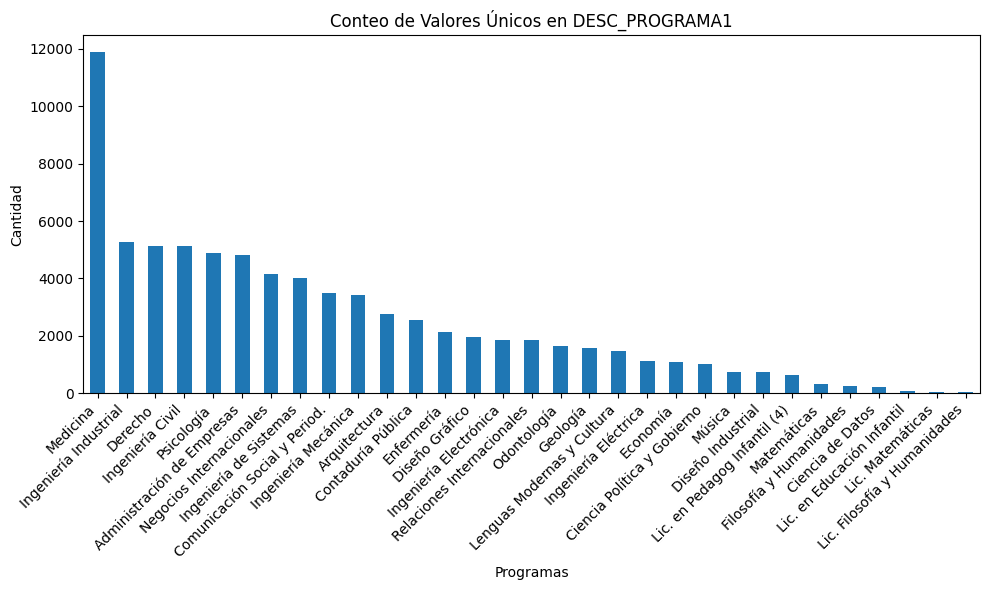

In [230]:
import matplotlib.pyplot as plt
counts = df['DESC_PROGRAMA1'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Programas')
plt.ylabel('Cantidad')
plt.title('Conteo de Valores Únicos en DESC_PROGRAMA1')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Nuevo dataset que incluye solo a los estudiantes nuevos que aspiraron a ingresar al programa de Geología y que completaron el proceso de inscripción

SEGMENTAMOS LA INFORMACION QUE NECESITAMOS

Sólo estudiantes de Geología, que sean de tipo Nuevo Ingreso y cuya solicitud de admisión se encuentre Decidida.

In [305]:
geodf=df[(df['DESC_PROGRAMA1']=='Geología') & (df['TIPO_ESTUDIANTE']=='1') & (df['ESTADO_SOLICITUD']=='D')]
geodf.reset_index(inplace=True, drop=True)
geodf.to_csv('geodf.csv', index=False)
geodf

,DISCAPACIDAD,IND_COMPLETA,IND_ACEPTADA,Ind_Sol_01_69_75,ULTIMO_PERIODO_ACADEMICO,IND_MATRICULADO,CODIGO,EDAD,SEXO,CIUDADANIA,...,DPTO_NACIMIENTO,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,IDIOMA_NATIVO,GRUPO_ETNICO,Beneficiario_Beca_Gobierno,FECHA_CREACION_INSC,FECHA_FINALIZACION_INSC,ATRIBUTO_SGASADD,Promedio_Notas_Bachillerato
0,NaN,Y,Y,Y,NaN,NaN,200091769.0,24.0,F,C,...,Antioquía,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
1,NaN,Y,Y,Y,NaN,NaN,200092063.0,25.0,M,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
2,NaN,Y,Y,N,NaN,NaN,200092012.0,24.0,M,C,...,Atlántico,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
3,NaN,Y,Y,Y,NaN,NaN,200091358.0,24.0,F,C,...,Sucre,Colombia,Colombia,Español,,No,NaN,NaN,NaN,NaN
4,00: Ninguno,Y,Y,Y,NaN,NaN,200089367.0,24.0,F,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,00: Ninguno,Y,Y,Y,NaN,NaN,200194719.0,21.0,F,C,...,Cordoba,Colombia,Colombia,Español,No aplica--,No,13/09/2022,13/09/2022,NaN,NaN
1228,00: Ninguno,Y,Y,Y,NaN,NaN,200198550.0,17.0,F,C,...,La Guajira,Colombia,Colombia,Español,Wayuu,No,26/11/2022,29/11/2022,NaN,NaN
1229,00: Ninguno,Y,Y,Y,NaN,NaN,200199014.0,17.0,M,C,...,Atlántico,Colombia,Colombia,Español,No aplica--,No,27/11/2022,30/11/2022,NaN,NaN
1230,00: Ninguno,Y,Y,Y,NaN,NaN,200198945.0,17.0,M,C,...,La Guajira,Colombia,Colombia,Español,No aplica--,No,30/11/2022,30/11/2022,NaN,NaN


#### Identificacion de datos nulos

Revisamos el nuevo dataset, ahora vamos a identificar columnas con gran cantidad de datos nulos

In [15]:
df_explore(geodf)

Shape:  (1232, 61)
+-----------------------------+---------+----------+-------+--------+
|            Column           |   Type  | Non-Null | Nulls | Unique |
+-----------------------------+---------+----------+-------+--------+
|         DISCAPACIDAD        |  object |   1157   |   75  |   5    |
|         IND_COMPLETA        |  object |   1232   |   0   |   1    |
|         IND_ACEPTADA        |  object |   1232   |   0   |   2    |
|       Ind_Sol_01_69_75      |  object |   1232   |   0   |   2    |
|   ULTIMO_PERIODO_ACADEMICO  | float64 |   563    |  669  |   19   |
|       IND_MATRICULADO       |  object |   487    |  745  |   2    |
|            CODIGO           | float64 |   1232   |   0   |  1113  |
|             EDAD            |  object |   1232   |   0   |   30   |
|             SEXO            |  object |   1232   |   0   |   2    |
|          CIUDADANIA         |  object |   1232   |   0   |   2    |
|          ATRIBUTOS          |  object |   839    |  393  |   85   |
|

MANEJO DE LOS DATOS NULOS

De la  anterior tabla, llama la atención que:

* En la categorización de colegios hay muchos datos nulos.
* Existen 2 columnas con la misma información, `'COLEGIO_PRIVADO'` y `'COLEGIO_PUBLICO'`, son excluyentes entre sí, por lo que puedo asumir que si un colegio NO es privado, entonces es Público. Entonces nos quedaremos con una sola y reemplazaremos los nulos por la categoría que corresponde.

* Respecto a `'COLEGIO_BILINGUE'`, podemos afirmar que los valores nulos corresponden a que el colegio NO es bilingue, por lo que procederemos a arreglar los valores por reemplazo.

* Este mismo tratamiento le daremos a columnas como `'ATRIBUTOS'` , `'INDICE DE MATRICULADOS'`, `'TIPO_DECISION'`, `'DESC_DECISION'`, `'DISCAPACIDAD'`.

* Las demás columnas **con mas de 600 datos nulos**, las eliminaremos del estudio.

In [306]:
l=['COLEGIO_PRIVADO','COLEGIO_PUBLICO','COLEGIO_BILINGUE','DISCAPACIDAD']
for i in l:
    print( geodf[i].value_counts(dropna=False),'\n','--------------------','\n')

COLEGIO_PRIVADO
NaN    640
Y      592
Name: count, dtype: int64 
 -------------------- 

COLEGIO_PUBLICO
NaN    772
Y      460
Name: count, dtype: int64 
 -------------------- 

COLEGIO_BILINGUE
NaN    1210
Y        22
Name: count, dtype: int64 
 -------------------- 

DISCAPACIDAD
00: Ninguno                          1127
NaN                                    75
04:Sensorial - Baja Visión             26
09:Discapacidad Física o motora         3
11:Trastorno del Espectro Autista       1
Name: count, dtype: int64 
 -------------------- 



* En discapacidad asumimos que NaN es que no tiene discapacidad. Reemplazamos.
* En `'ATRIBUTOS'` , `'INDICE DE MATRICULADOS'`, `'TIPO_DECISION'`, `'DESC_DECISION'`asumimos que si no es una Y, es un N


In [307]:
geodf.drop('COLEGIO_PUBLICO', inplace=True,axis=1)
geodf['DISCAPACIDAD'].replace(np.nan, '00: Ninguno', inplace=True)

replace=['IND_MATRICULADO','ATRIBUTOS', 'COLEGIO_PRIVADO', 'COLEGIO_BILINGUE']

for variable in replace:
  geodf[variable].replace(np.nan, 'N', inplace=True)


In [308]:
geodf.isnull().sum()

DISCAPACIDAD                      0
IND_COMPLETA                      0
IND_ACEPTADA                      0
Ind_Sol_01_69_75                  0
ULTIMO_PERIODO_ACADEMICO        669
IND_MATRICULADO                   0
CODIGO                            0
EDAD                              0
SEXO                              0
CIUDADANIA                        0
ATRIBUTOS                         0
DESC_DPTO1                        2
DESC_MUNICIPIO1                   2
DESC_PAIS1                        2
FECHA_SOLICITUD                   0
ESTADO_SOLICITUD                  0
TIPO_ESTUDIANTE                   0
TASA                              0
DESC_PROGRAMA1                    0
Desc_Division1                    0
ESTRATO                           0
DESC_BACHILLERATO                 3
CIUDAD_BACHILLERATO               0
DESC_DPTO_BACHILLERATO            0
DESC_PAIS_BACHILLERATO            0
FECHA_GRADO_BCHILLERATO        1222
PERCENTIL_GLOBAL                182
COLEGIO_PRIVADO             

In [309]:
geodf.shape

(1232, 60)

* Buscamos y eliminamos columnas con mas de 600 datos nulos.

In [310]:
# Encuentra y elimina las columnas con más de 600 datos nulos
nulls= pd.DataFrame(geodf.isnull().sum() )# Para conocer los nulos por columnas
delete=nulls[nulls.iloc[:, 0] > 600] #Columnas con mas de 1000 datos nulos podrían ser eliminadas
delete=delete.index
delete


Index(['ULTIMO_PERIODO_ACADEMICO', 'FECHA_GRADO_BCHILLERATO',
       'U_TRANS_EXTERNA', 'DESC_EXAMEN11', 'PUNTAJE11', 'PRUEBA_EXTRANJERA',
       'ESTADO_ACADEMICO', 'PROMEDIO', 'PROGRAMA_ANTERIOR',
       'VENCIMIENTO_PAGO_01_02', 'PAGO_03', 'FECHA_CREACION_INSC',
       'FECHA_FINALIZACION_INSC', 'ATRIBUTO_SGASADD',
       'Promedio_Notas_Bachillerato'],
      dtype='object')

In [311]:
geodf.drop(delete, axis=1, inplace=True)

In [312]:
nulos= geodf.isnull().sum()
nulos

DISCAPACIDAD                    0
IND_COMPLETA                    0
IND_ACEPTADA                    0
Ind_Sol_01_69_75                0
IND_MATRICULADO                 0
CODIGO                          0
EDAD                            0
SEXO                            0
CIUDADANIA                      0
ATRIBUTOS                       0
DESC_DPTO1                      2
DESC_MUNICIPIO1                 2
DESC_PAIS1                      2
FECHA_SOLICITUD                 0
ESTADO_SOLICITUD                0
TIPO_ESTUDIANTE                 0
TASA                            0
DESC_PROGRAMA1                  0
Desc_Division1                  0
ESTRATO                         0
DESC_BACHILLERATO               3
CIUDAD_BACHILLERATO             0
DESC_DPTO_BACHILLERATO          0
DESC_PAIS_BACHILLERATO          0
PERCENTIL_GLOBAL              182
COLEGIO_PRIVADO                 0
COLEGIO_BILINGUE                0
GLOBAL                         12
MATEMATICAS                    12
Rango         

Revisemos que ocurre con las features que aún tienen datos nulos, empezando por las que tienen mayor cantidad:

In [313]:
nan=[]
for i in nulos.index:
    if nulos[i]>0:
        nan.append(i)
print (nan)

['DESC_DPTO1', 'DESC_MUNICIPIO1', 'DESC_PAIS1', 'DESC_BACHILLERATO', 'PERCENTIL_GLOBAL', 'GLOBAL', 'MATEMATICAS', 'LECTURA', 'SOCIALES', 'NATURALES', 'INGLES', 'CIUDAD_NACIMIENTO', 'DPTO_NACIMIENTO']


* para los features `'PERCENTIL_GLOBAL'`, `'GLOBAL'`, `'MATEMATICAS'`, `'LECTURA'`, `'SOCIALES'`, `'NATURALES'`, `'INGLES'` podríamos utilizar un metodo de imputación. Como estos features corresponden a resultados de pruebas SABER, son de caracter numérico y contínuo, podríamos utilizar la **técnica KNN** . Es decir, estimar los puntajes a través de la identificación de otros aspirantes que tengan características parecidas.

In [314]:
from sklearn.impute import KNNImputer

l= ['PERCENTIL_GLOBAL', 'GLOBAL', 'MATEMATICAS', 'LECTURA', 'SOCIALES', 'NATURALES', 'INGLES']
for column in l:
  X =geodf[column].values.reshape(-1, 1)
  imputer = KNNImputer(n_neighbors=3, weights="distance")
  geodf[column]=imputer.fit_transform(X)
print('done')

done


In [315]:
geodf.isnull().sum()

DISCAPACIDAD                  0
IND_COMPLETA                  0
IND_ACEPTADA                  0
Ind_Sol_01_69_75              0
IND_MATRICULADO               0
CODIGO                        0
EDAD                          0
SEXO                          0
CIUDADANIA                    0
ATRIBUTOS                     0
DESC_DPTO1                    2
DESC_MUNICIPIO1               2
DESC_PAIS1                    2
FECHA_SOLICITUD               0
ESTADO_SOLICITUD              0
TIPO_ESTUDIANTE               0
TASA                          0
DESC_PROGRAMA1                0
Desc_Division1                0
ESTRATO                       0
DESC_BACHILLERATO             3
CIUDAD_BACHILLERATO           0
DESC_DPTO_BACHILLERATO        0
DESC_PAIS_BACHILLERATO        0
PERCENTIL_GLOBAL              0
COLEGIO_PRIVADO               0
COLEGIO_BILINGUE              0
GLOBAL                        0
MATEMATICAS                   0
Rango                         0
LECTURA                       0
SOCIALES

* Para estos individuos, asignamos como `DESC_DPTO1`, 'DESC_MUNICIPIO1' y 'DESC_PAIS1' los valores de Ciudad, Dpto y País de nacimiento

In [316]:
# Define los códigos de interés
codigos_interes = geodf[geodf['DESC_DPTO1'].isnull()]['CODIGO'].values

# Realiza las asignaciones en base a los códigos de interés
geodf.loc[geodf['CODIGO'].isin(codigos_interes), 'DESC_DPTO1'] = geodf['DPTO_NACIMIENTO']
geodf.loc[geodf['CODIGO'].isin(codigos_interes), 'DESC_MUNICIPIO1'] = geodf['CIUDAD_NACIMIENTO']
geodf.loc[geodf['CODIGO'].isin(codigos_interes), 'DESC_PAIS1'] = geodf['PAIS_NACIMIENTO']


Para los valores nulos de `DESC_Bachillerato`, imputamos el valor de la *moda* para colegios de la ciudad de Bachillerato.

In [317]:
codigos_interes= geodf[geodf['DESC_BACHILLERATO'].isnull()]['CODIGO'].values
for codigo in codigos_interes:
    # Encuentra la ciudad de bachillerato para el código actual
    city = geodf.loc[geodf['CODIGO'] == codigo, 'CIUDAD_BACHILLERATO'].iloc[0]

    # Calcula la moda de DESC_BACHILLERATO para la ciudad de bachillerato actual
    mode = geodf[geodf['CIUDAD_BACHILLERATO'] == city]['DESC_BACHILLERATO'].mode()

    # Verifica si la moda está vacía (si no hay valores repetidos)
    if not mode.empty:
        # Asigna la moda al registro actual en DESC_BACHILLERATO
        geodf.loc[geodf['CODIGO'] == codigo, 'DESC_BACHILLERATO'] = mode.iloc[0]
    else:
        geodf.loc[geodf['CODIGO'] == codigo, 'DESC_BACHILLERATO'] ='Colegio_sin_identificar'




In [318]:
geodf.isnull().sum()

DISCAPACIDAD                  0
IND_COMPLETA                  0
IND_ACEPTADA                  0
Ind_Sol_01_69_75              0
IND_MATRICULADO               0
CODIGO                        0
EDAD                          0
SEXO                          0
CIUDADANIA                    0
ATRIBUTOS                     0
DESC_DPTO1                    0
DESC_MUNICIPIO1               0
DESC_PAIS1                    0
FECHA_SOLICITUD               0
ESTADO_SOLICITUD              0
TIPO_ESTUDIANTE               0
TASA                          0
DESC_PROGRAMA1                0
Desc_Division1                0
ESTRATO                       0
DESC_BACHILLERATO             0
CIUDAD_BACHILLERATO           0
DESC_DPTO_BACHILLERATO        0
DESC_PAIS_BACHILLERATO        0
PERCENTIL_GLOBAL              0
COLEGIO_PRIVADO               0
COLEGIO_BILINGUE              0
GLOBAL                        0
MATEMATICAS                   0
Rango                         0
LECTURA                       0
SOCIALES

Finalmente para el estudiante con valor Nulo en Ciudad y Departamento de nacimiento, imputaremos la información de la ciudad y departamento del Bachillerato utilizando el mismo procedimiento anterior.

In [319]:
# Define los códigos de interés
cod = geodf[geodf['CIUDAD_NACIMIENTO'].isnull()]['CODIGO'].iloc[0]
cod2 = geodf[geodf['DPTO_NACIMIENTO'].isnull()]['CODIGO'].iloc[0]

# Realiza las asignaciones en base a los códigos de interés
geodf.loc[geodf['CODIGO']==cod, 'CIUDAD_NACIMIENTO'] = geodf['CIUDAD_BACHILLERATO']
geodf.loc[geodf['CODIGO']==cod2, 'DPTO_NACIMIENTO'] = geodf['DESC_DPTO_BACHILLERATO']

Verificamos que en este punto, no deben haber datos nulos en nuestro dataset

In [320]:
geodf.isnull().sum().sum()

0

In [321]:
geodf.to_csv('geodef_sinNulos.csv', index=False)

In [32]:
#geodf=pd.read_csv('geodef_sinNulos.csv', sep=',')

#### Mas feature engineering

Una vez eliminados los datos nulos y antes de realizar visualizaciones, vamos a ajustar los tipos de datos de cada Feature y revisemos las que pueden ser susceptibles a ser transformadas por el One-Hot Encoder

*Transformamos la `EDAD` a enteros y la `Fecha de solicitud` a DateTime y extraemos solo el mes, eliminamos la columna `CODIGO`.

In [322]:
geodf[['CODIGO', 'TASA']] = geodf[['CODIGO', 'TASA']].astype(str)
geodf['ESTRATO']=geodf['ESTRATO'].astype(str)


In [323]:
import calendar

# Asegúrate de que 'FECHA_DECISION_SOLICITUD' sea del tipo datetime
geodf['FECHA_DECISION_SOLICITUD'] = pd.to_datetime(geodf['FECHA_DECISION_SOLICITUD'])
geodf['FECHA_SOLICITUD'] = pd.to_datetime(geodf['FECHA_SOLICITUD'])

# Extraer el nombre del mes y crear una nueva columna en el DataFrame
geodf['MES_DECISION'] = geodf['FECHA_DECISION_SOLICITUD'].apply(lambda x: calendar.month_name[x.month])
geodf['MES_SOLICITUD'] = geodf['FECHA_SOLICITUD'].apply(lambda x: calendar.month_name[x.month])



In [324]:
geodf.drop(['FECHA_DECISION_SOLICITUD','FECHA_SOLICITUD'],axis=1, inplace=True)

In [325]:
df_explore(geodf)

Shape:  (1232, 45)
+----------------------------+---------+----------+-------+--------+
|           Column           |   Type  | Non-Null | Nulls | Unique |
+----------------------------+---------+----------+-------+--------+
|        DISCAPACIDAD        |  object |   1232   |   0   |   4    |
|        IND_COMPLETA        |  object |   1232   |   0   |   1    |
|        IND_ACEPTADA        |  object |   1232   |   0   |   2    |
|      Ind_Sol_01_69_75      |  object |   1232   |   0   |   2    |
|      IND_MATRICULADO       |  object |   1232   |   0   |   2    |
|           CODIGO           |  object |   1232   |   0   |  1113  |
|            EDAD            |  object |   1232   |   0   |   30   |
|            SEXO            |  object |   1232   |   0   |   2    |
|         CIUDADANIA         |  object |   1232   |   0   |   2    |
|         ATRIBUTOS          |  object |   1232   |   0   |   85   |
|         DESC_DPTO1         |  object |   1232   |   0   |   26   |
|      DESC_MUN

* Vamos a ajustar la columna `DESC_DECISION `, ya que tiene muchas categorías que realmente no necesitamos. Todos los estudiantes pasarán a ADMITIDOS y excepto los que no continuaron el proceso y los que no fueron ADMITIDOS

*Ajustaremos también la información de Becas del Gobierno a partir de la información de la columna `DESC_DECISION`

In [326]:
geodf['DESC_DECISION'].value_counts()

DESC_DECISION
Admitido(a)                       904
Admitido(a) Ser Pilo Paga         118
No admitido(a)                     71
Admitido(a) Generación E           51
Admitido(a) Ser Pilo Paga3         32
Admitido(a)SPP, para el 2017-2     18
Admitido(a) para el II-2017        15
No continuará con el proceso       14
Admitido(a) Ser Pilo Paga2          9
Name: count, dtype: int64

In [327]:
geodf['BECADO_GOB']=geodf['DESC_DECISION']

In [328]:
nuevos_valores = {
    'Admitido(a)': 'N',
    'Admitido(a) Ser Pilo Paga': 'Y',
    'Admitido(a) Generación E': 'Y',
    'Admitido(a) Ser Pilo Paga3': 'Y',
    'Admitido(a)SPP, para el 2017-2': 'Y',
    'Admitido(a) para el II-2017': 'Y',
    'Admitido(a) Ser Pilo Paga2': 'Y',
    'No admitido(a)': 'N',
    'No continuará con el proceso': 'N'
}

geodf['BECADO_GOB'] = geodf['BECADO_GOB'].replace(nuevos_valores)


In [329]:
geodf['BECADO_GOB'].value_counts()
geodf.drop('Beneficiario_Beca_Gobierno', axis=1,inplace=True)

In [330]:
nuevos_valores = {
    'Admitido(a)': 'Admitido',
    'Admitido(a) Ser Pilo Paga': 'Admitido',
    'Admitido(a) Generación E': 'Admitido',
    'Admitido(a) Ser Pilo Paga3': 'Admitido',
    'Admitido(a)SPP, para el 2017-2': 'Admitido',
    'Admitido(a) para el II-2017': 'Admitido',
    'Admitido(a) Ser Pilo Paga2': 'Admitido'
}
geodf['DESC_DECISION'] = geodf['DESC_DECISION'].replace(nuevos_valores)


In [332]:
df_explore(geodf)

Shape:  (1232, 45)
+------------------------+---------+----------+-------+--------+
|         Column         |   Type  | Non-Null | Nulls | Unique |
+------------------------+---------+----------+-------+--------+
|      DISCAPACIDAD      |  object |   1232   |   0   |   4    |
|      IND_COMPLETA      |  object |   1232   |   0   |   1    |
|      IND_ACEPTADA      |  object |   1232   |   0   |   2    |
|    Ind_Sol_01_69_75    |  object |   1232   |   0   |   2    |
|    IND_MATRICULADO     |  object |   1232   |   0   |   2    |
|         CODIGO         |  object |   1232   |   0   |  1113  |
|          EDAD          |  object |   1232   |   0   |   30   |
|          SEXO          |  object |   1232   |   0   |   2    |
|       CIUDADANIA       |  object |   1232   |   0   |   2    |
|       ATRIBUTOS        |  object |   1232   |   0   |   85   |
|       DESC_DPTO1       |  object |   1232   |   0   |   26   |
|    DESC_MUNICIPIO1     |  object |   1232   |   0   |  130   |
|     

### VISUALIZACIONES

Revisaremos e identificaremos posibles correlaciones entre variables numéricas, distinguiendo Matriculados de No Matriculados.

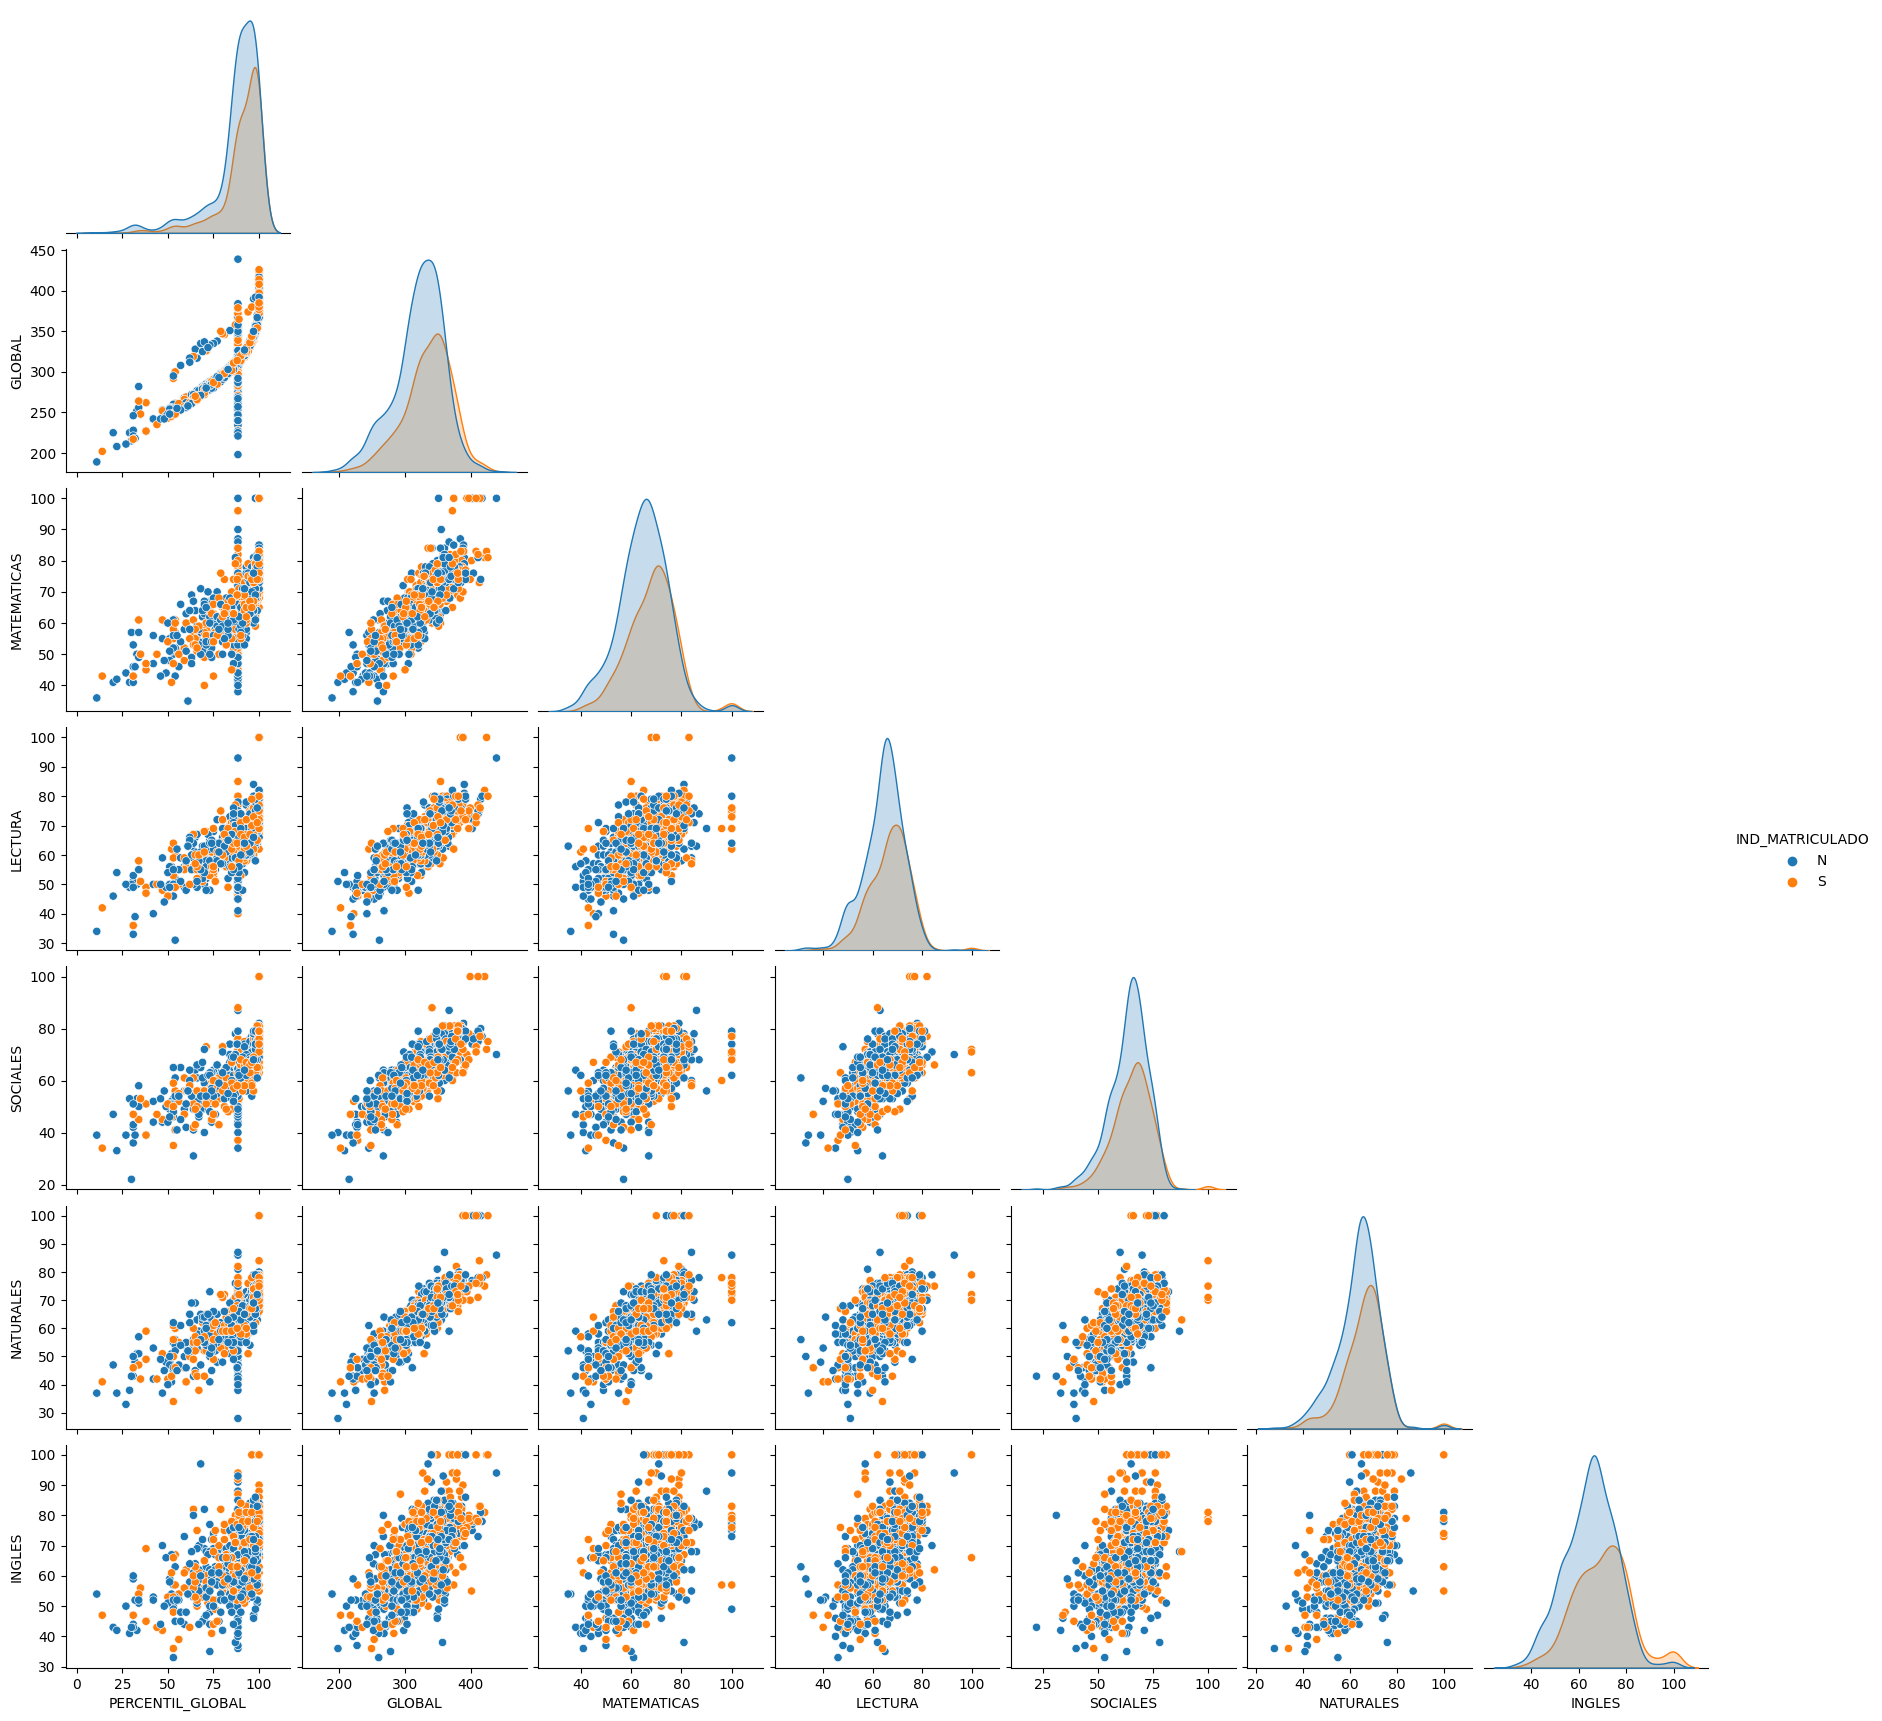

In [333]:
import seaborn as sns

sns.pairplot(geodf, hue='IND_MATRICULADO', corner=True)


**OBSERVACION**

De esta gráfica observamos que existe una clara y constante correlación positiva entre los resultados de las diferentes áreas de la prueba SABER.

Ahora realizamos un mapa de calor que nos cuantifique las correlaciones.

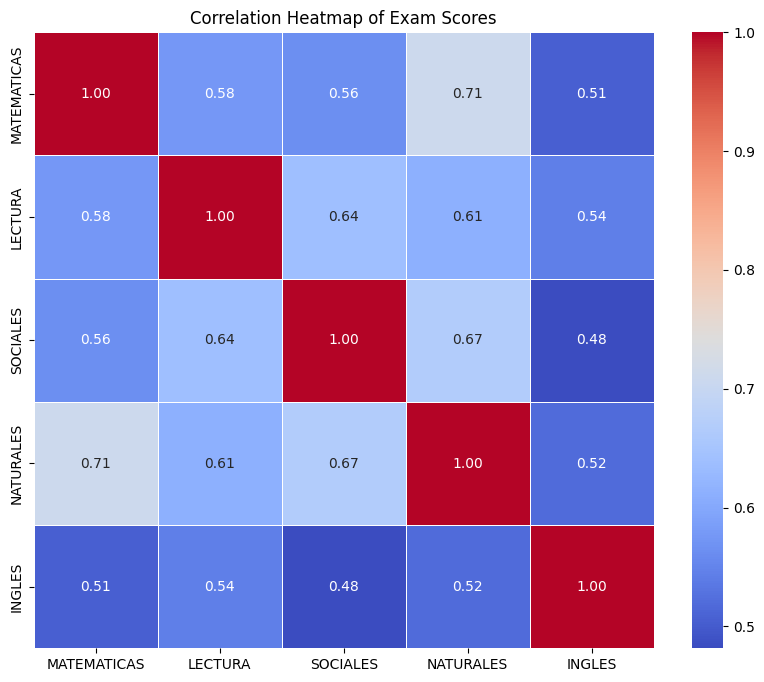

In [44]:

from matplotlib import pyplot as plt


plt.figure(figsize=(10, 8))
corr_matrix = geodf[['MATEMATICAS', 'LECTURA', 'SOCIALES', 'NATURALES', 'INGLES']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Exam Scores')
plt.show()

** OBSERVACIONES**
* Coincidiendo con la gráfica anterior, sí existe correlación positiva entre los resultados de las diferentes pruebas, siendo la más fuerte entre Naturales y Matemáticas, áreas que sin duda son importantes para las carreras en Ciencias.

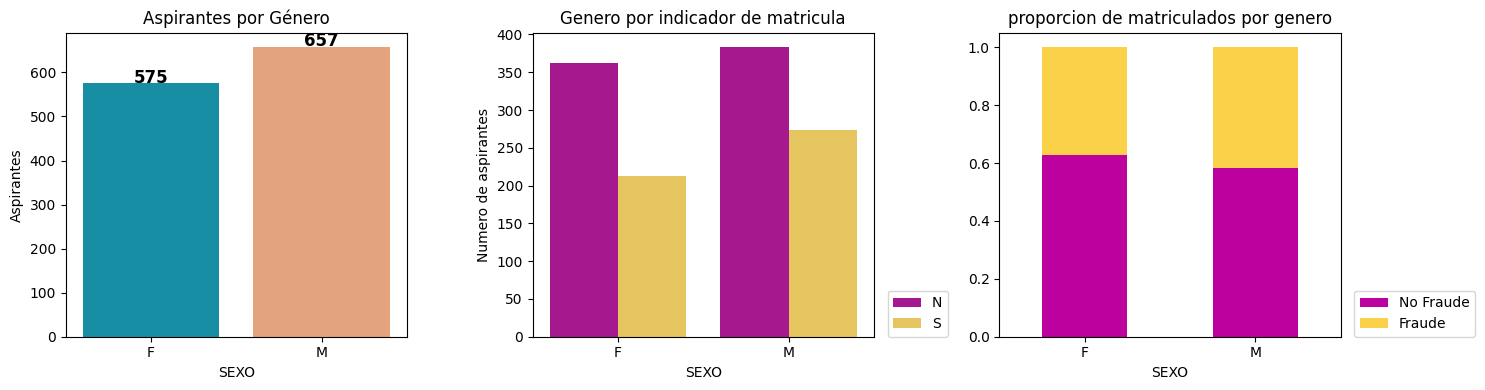

In [45]:
# Visualicemos algunas variables del dataset

fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
ax = sns.countplot(x=geodf['SEXO'], palette = ['#019ebc', '#f49e6e', '#a2708e'],
                   order = geodf['SEXO'].value_counts(sort = False).index)
labels = (geodf['SEXO'].value_counts(sort = False))

for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')

plt.title('Aspirantes por Género')
plt.ylabel('Aspirantes')
plt.tight_layout()

ax2 = fig.add_subplot(132)
sns.countplot(x = geodf['SEXO'], hue=geodf['IND_MATRICULADO'], palette=["#bc019e", "#fcd14a"], ax = ax2)
plt.title('Genero por indicador de matricula')
plt.ylabel('Numero de aspirantes')
plt.legend(( 'N', 'S'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax3 = fig.add_subplot(133)
d = geodf.groupby('SEXO')['IND_MATRICULADO'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax3, color =["#bc019e", "#fcd14a"])
plt.title('proporcion de matriculados por genero')
plt.legend(( 'No Fraude', 'Fraude'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

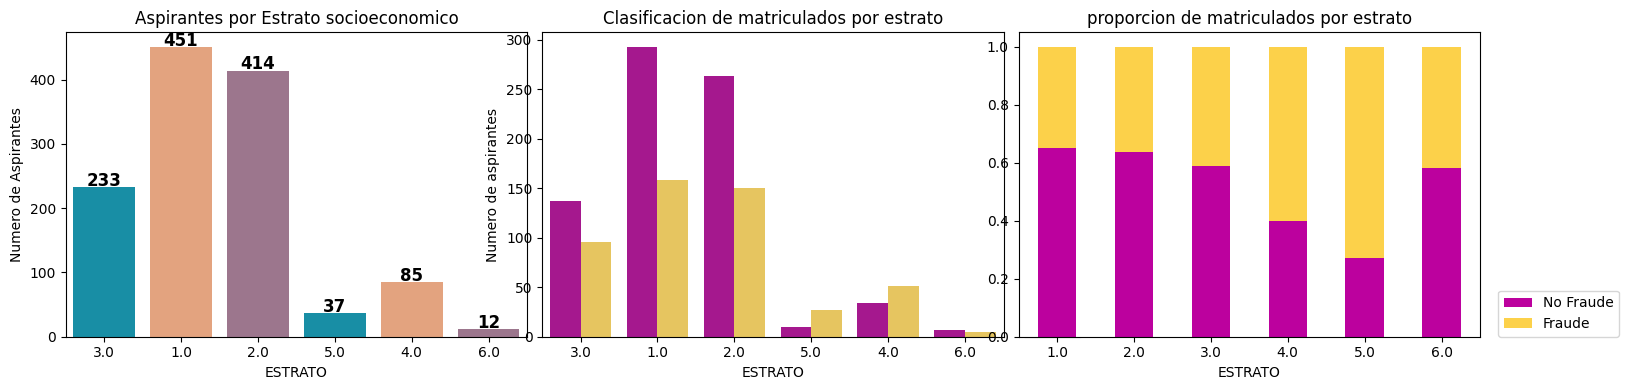

In [46]:
# Visualicemos algunas variables del dataset

fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
ax = sns.countplot(x=geodf['ESTRATO'], palette = ['#019ebc', '#f49e6e', '#a2708e'],
                   order = geodf['ESTRATO'].value_counts(sort = False).index)
labels = (geodf['ESTRATO'].value_counts(sort = False))

for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')

plt.title('Aspirantes por Estrato socioeconomico')
plt.ylabel('Numero de Aspirantes')
plt.tight_layout()

ax2 = fig.add_subplot(132)
sns.countplot(x = geodf['ESTRATO'], hue=geodf['IND_MATRICULADO'], palette=["#bc019e", "#fcd14a"], ax = ax2)
plt.title('Clasificacion de matriculados por estrato')
plt.ylabel('Numero de aspirantes')
plt.legend(( 'N', 'S'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax3 = fig.add_subplot(133)
d = geodf.groupby('ESTRATO')['IND_MATRICULADO'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax3, color =["#bc019e", "#fcd14a"])
plt.title('proporcion de matriculados por estrato')
plt.legend(( 'No Fraude', 'Fraude'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

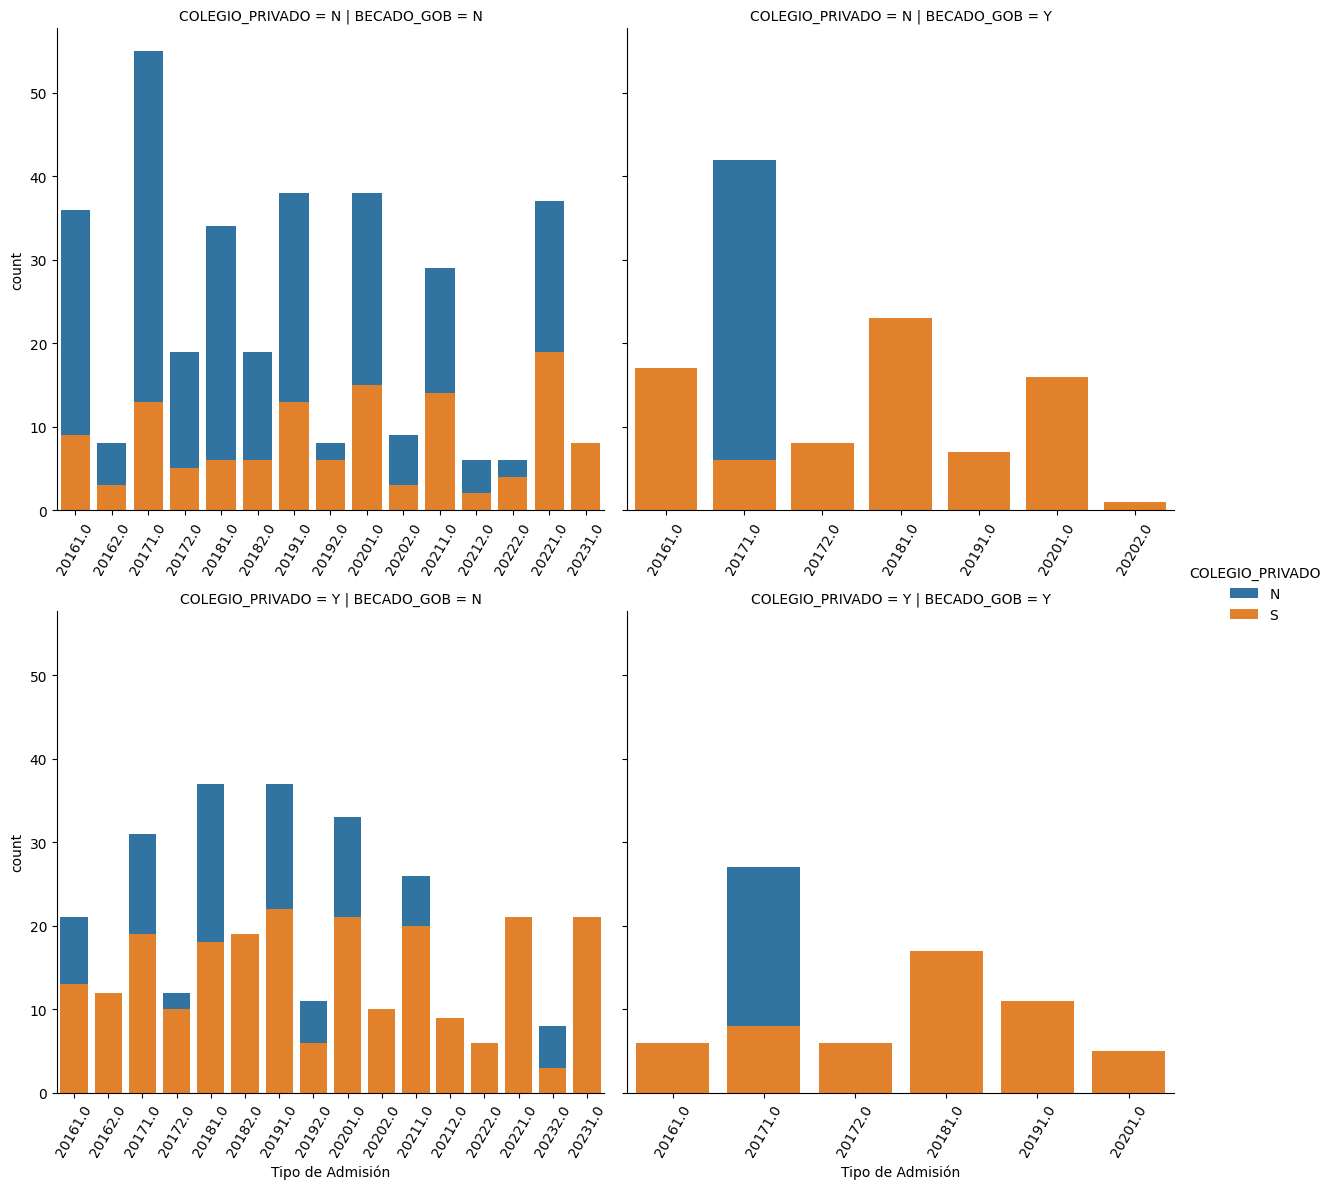

In [337]:
import seaborn as sns

# Crea un objeto FacetGrid con col, row y hue especificados
g = sns.FacetGrid(geodf, col="BECADO_GOB", row="COLEGIO_PRIVADO", hue='IND_MATRICULADO', height=6, sharey=True, sharex=False, legend_out=True)

# Mapea un gráfico de barras de recuento para la columna 'TASA'
g.map(sns.countplot, 'TASA')

# Establece etiquetas de los ejes y rota las etiquetas del eje x para mejorar la legibilidad
g.set_axis_labels("Tipo de Admisión")
g.set_xticklabels(rotation=60)

# Ajusta el diseño para que los gráficos no se superpongan
g.tight_layout()

# Agrega una leyenda para la variable 'COLEGIO_PRIVADO'
g.add_legend(title='COLEGIO_PRIVADO')

# Muestra el gráfico
plt.show()


Text(0.5, 1.0, 'Matriculados x Estrato Socioeconómico según asignación de Becas')

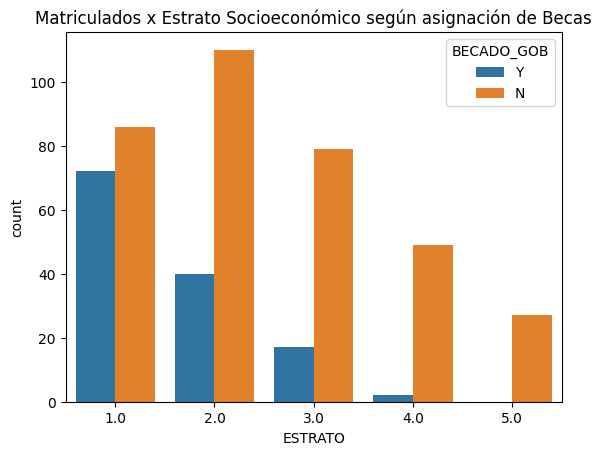

In [48]:
dfmat=geodf[geodf['IND_MATRICULADO']=='S'] #Segmento un nuevo DF solo para estudiantes matriculados
q=sns.countplot(data=dfmat, x='ESTRATO', hue='BECADO_GOB', order=['1.0','2.0','3.0','4.0', '5.0'])
q.set_title("Matriculados x Estrato Socioeconómico según asignación de Becas")

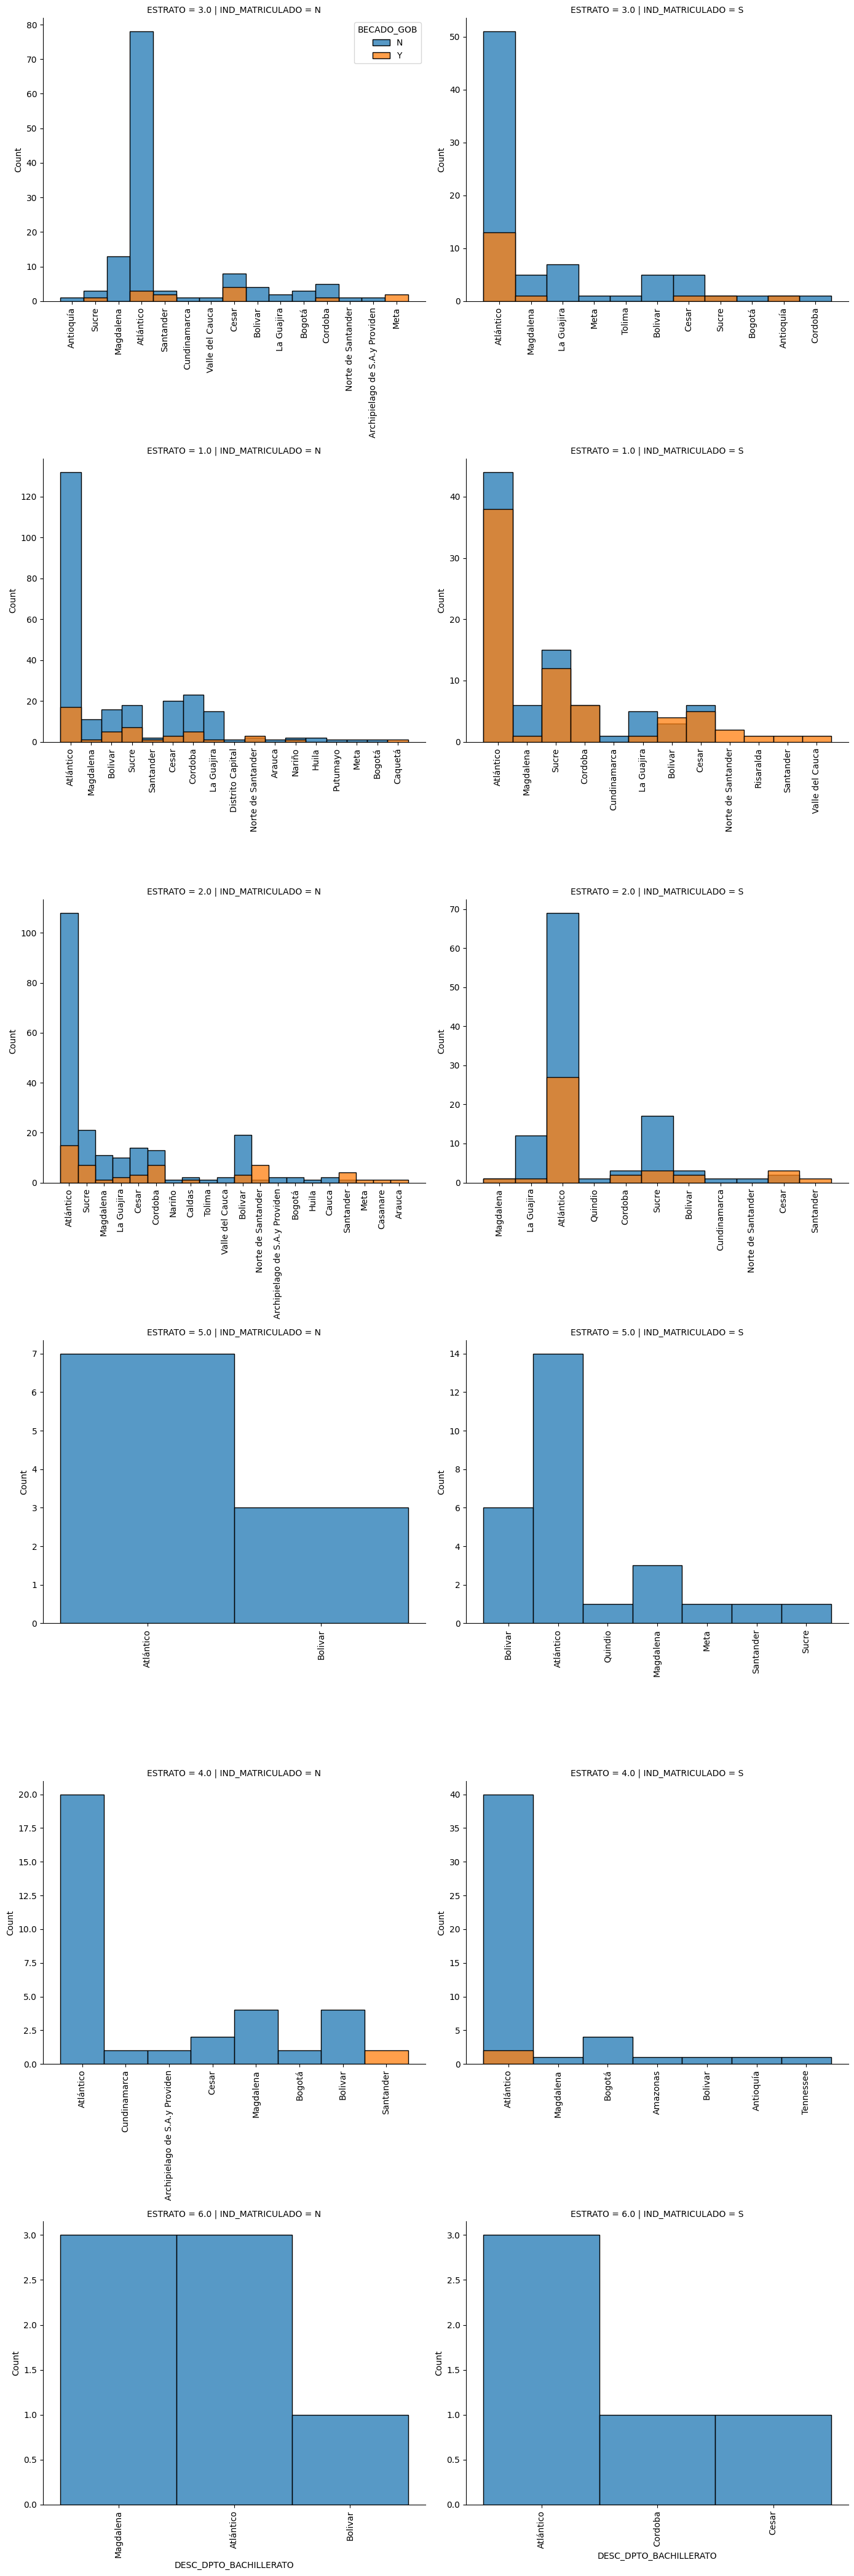

In [49]:
g=sns.FacetGrid(geodf, col="IND_MATRICULADO", row="ESTRATO", sharey=False, hue='BECADO_GOB', sharex=False, legend_out=False, height= 7)
g.map(sns.histplot, 'DESC_DPTO_BACHILLERATO')
g.set_xticklabels( rotation=90)
g.add_legend()
g.tight_layout()

### FEATURE ENGINEERING II (Balanceo de clases SMOTE y One Hot Encoding) 

In [339]:
numericas=(geodf.select_dtypes(include=['float64','int'])).columns
categoricas=(geodf.select_dtypes(include=['object'])).columns

In [340]:
categorias_bajas_frecuencia = []
umbral_frecuencia = 1  # Umbral del 1% de frecuencia relativa

for columna in categoricas:
    print(geodf[columna].value_counts())
    print('---------------------')
    n_cat = geodf[columna].nunique()  # Número de categorías únicas en la columna
    print('Total de categorias de esta feature:', n_cat)
    print('---------------------')
    if n_cat > 10:
        freq_rel = (geodf[columna].value_counts() / len(geodf[columna])) * 100  # Frecuencia relativa en porcentaje
        categorias_bajas_frec = freq_rel[freq_rel < umbral_frecuencia].index.tolist()
        categorias_bajas_frecuencia.extend(categorias_bajas_frec)

print(categorias_bajas_frecuencia)

DISCAPACIDAD
00: Ninguno                          1202
04:Sensorial - Baja Visión             26
09:Discapacidad Física o motora         3
11:Trastorno del Espectro Autista       1
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 4
---------------------
IND_COMPLETA
Y    1232
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 1
---------------------
IND_ACEPTADA
Y    1105
N     127
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 2
---------------------
Ind_Sol_01_69_75
Y    904
N    328
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 2
---------------------
IND_MATRICULADO
N    745
S    487
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 2
---------------------
CODIGO
200100815.0    4
200108413.0    3
200107360.0    3
200182023.0    3
200162946.0    3
              ..
200124957.0    1
200125813.0    1
200124

In [341]:
for columna in categoricas:
    geodf[columna] = geodf[columna].apply(lambda x: 'otro' if x in categorias_bajas_frecuencia else x)

Define la variable objetivo o Target

In [342]:
y=geodf['IND_MATRICULADO']
geodf.drop('IND_MATRICULADO', axis=1, inplace=True)

In [54]:
categoricas

Index(['DISCAPACIDAD', 'IND_COMPLETA', 'IND_ACEPTADA', 'Ind_Sol_01_69_75',
       'IND_MATRICULADO', 'SEXO', 'CIUDADANIA', 'ATRIBUTOS', 'DESC_DPTO1',
       'DESC_MUNICIPIO1', 'DESC_PAIS1', 'ESTADO_SOLICITUD', 'TIPO_ESTUDIANTE',
       'TASA', 'DESC_PROGRAMA1', 'Desc_Division1', 'ESTRATO',
       'DESC_BACHILLERATO', 'CIUDAD_BACHILLERATO', 'DESC_DPTO_BACHILLERATO',
       'DESC_PAIS_BACHILLERATO', 'COLEGIO_PRIVADO', 'COLEGIO_BILINGUE',
       'Rango', 'TIPO_DECISION', 'DESC_DECISION', 'PAGO_01_02',
       'CIUDAD_NACIMIENTO', 'DPTO_NACIMIENTO', 'PAIS_NACIMIENTO',
       'PAIS_NACIONALIDAD', 'IDIOMA_NATIVO', 'GRUPO_ETNICO', 'BECADO_GOB'],
      dtype='object')

Ultima depuracion de variables categoricas antes del OHE

In [343]:
eliminar = ['PAGO_01_02', 'Ind_Sol_01_69_75','Desc_Division1', 'DESC_PROGRAMA1','TIPO_ESTUDIANTE','TIPO_DECISION']
geodf.drop(eliminar, inplace=True, axis=1)

In [348]:
categoricas=(geodf.select_dtypes(include=['object'])).columns
categoricas

Index(['DISCAPACIDAD', 'IND_COMPLETA', 'IND_ACEPTADA', 'CODIGO', 'EDAD',
       'SEXO', 'CIUDADANIA', 'ATRIBUTOS', 'DESC_DPTO1', 'DESC_MUNICIPIO1',
       'DESC_PAIS1', 'ESTADO_SOLICITUD', 'TASA', 'ESTRATO',
       'DESC_BACHILLERATO', 'CIUDAD_BACHILLERATO', 'DESC_DPTO_BACHILLERATO',
       'DESC_PAIS_BACHILLERATO', 'COLEGIO_PRIVADO', 'COLEGIO_BILINGUE',
       'Rango', 'DESC_DECISION', 'CIUDAD_NACIMIENTO', 'DPTO_NACIMIENTO',
       'PAIS_NACIMIENTO', 'PAIS_NACIONALIDAD', 'IDIOMA_NATIVO', 'GRUPO_ETNICO',
       'MES_DECISION', 'MES_SOLICITUD', 'BECADO_GOB'],
      dtype='object')

APLICANDO ONE HOT ENCODER

In [368]:
ndf=geodf[categoricas]

In [369]:
ndf=pd.get_dummies(ndf,drop_first=True).astype('int32')

In [373]:
ndf.head()

,DISCAPACIDAD_04:Sensorial - Baja Visión,DISCAPACIDAD_09:Discapacidad Física o motora,DISCAPACIDAD_11:Trastorno del Espectro Autista,IND_ACEPTADA_Y,EDAD_18.0,EDAD_19.0,EDAD_20.0,EDAD_21.0,EDAD_22.0,EDAD_23.0,...,MES_SOLICITUD_December,MES_SOLICITUD_January,MES_SOLICITUD_June,MES_SOLICITUD_March,MES_SOLICITUD_May,MES_SOLICITUD_November,MES_SOLICITUD_October,MES_SOLICITUD_September,MES_SOLICITUD_otro,BECADO_GOB_Y
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [370]:
geodf.drop(categoricas,axis=1,inplace=True)

In [371]:
df=pd.concat([geodf, ndf], axis=1)

In [372]:
df.to_csv('df_concat.csv', index=False)

####  IDENTIFICANDO MULTICOLINEALIDAD

Decidí no realizarla porque se eliminan columnas que considero importantes para mi eestudio, sin embargo, aquí dejo el código que utilicé en el primer intento

In [62]:
'''from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return vif'''

"from statsmodels.stats.outliers_influence import variance_inflation_factor\n\ndef calculate_vif(dataset):\n    vif = pd.DataFrame()\n    vif['features'] = dataset.columns\n    vif['VIF_value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]\n    return vif"

In [63]:
'''def eliminacion_vif(vif,df):
  max_vif= vif['VIF_value'].max()
  if max_vif >= 5:
    print('-------------------------')
    idxmax=vif['VIF_value'].idxmax() #Hallar el valor maximo de la columna VIF_Value y traer el indice
    print('eliminamos ',vif.iloc[idxmax, 0],' con VIF de: ', max_vif)
    df.drop((vif.iloc[idxmax, 0]),axis=1, inplace=True)# Con ese indice obtener el "feature" y eliminarlo de dataset
    return True
  else:
    print('-------------------------')
    print('Ya no hay valores vif mayores a 5')
    return False'''

'def eliminacion_vif(vif,df):\n  max_vif= vif[\'VIF_value\'].max()\n  if max_vif >= 5:\n    print(\'-------------------------\')\n    idxmax=vif[\'VIF_value\'].idxmax() #Hallar el valor maximo de la columna VIF_Value y traer el indice\n    print(\'eliminamos \',vif.iloc[idxmax, 0],\' con VIF de: \', max_vif)\n    df.drop((vif.iloc[idxmax, 0]),axis=1, inplace=True)# Con ese indice obtener el "feature" y eliminarlo de dataset\n    return True\n  else:\n    print(\'-------------------------\')\n    print(\'Ya no hay valores vif mayores a 5\')\n    return False'

In [64]:
'''dfloat = df.select_dtypes(include=['float64', 'Int64'])'''

"dfloat = df.select_dtypes(include=['float64', 'Int64'])"

In [65]:
'''elimina = True
while elimina:
    vif = calculate_vif(dfloat)
    elimina = eliminacion_vif(vif, dfloat)
    features=vif.features
    print(vif.head(10))'''

'elimina = True\nwhile elimina:\n    vif = calculate_vif(dfloat)\n    elimina = eliminacion_vif(vif, dfloat)\n    features=vif.features\n    print(vif.head(10))'

In [374]:
#X=df[vif.features] #definidos X con las features que sobrevivieron al VIF
X=df
X.to_csv('Xvif.csv', index=False)

#### BALANCE DE LAS CATEGORIAS DEL TARGET

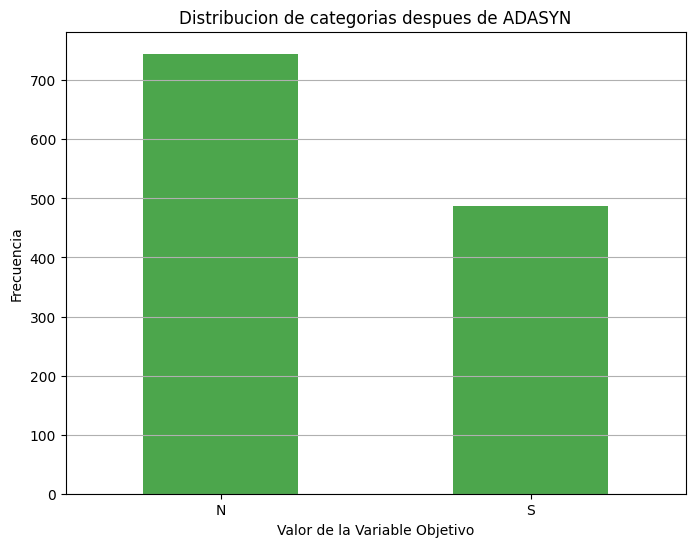

In [67]:
#Hagamos una gráfica para conocer balance de las categorias
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Valor de la Variable Objetivo')
plt.ylabel('Frecuencia')
plt.title('Distribucion de categorias despues de ADASYN')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')
plt.show()

Convertimos valores S en 1 y N en 0

In [375]:
y=y.replace({'S': 1, 'N': 0})
y.to_csv('y.csv', index=False)

In [376]:
from sklearn.model_selection import train_test_split

In [377]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, stratify=y, random_state=66)

#### Tecnica SMOTE

Como nuestro dataset se encuentra desbalanceado, es posible que al final las matrices de confusion y nuestros calculos de metricas se vean sesgados por esta diferencia de proporciones.

Vamos a aplicar la tenica de Oversampling utilizada en uno de los artículos.

In [378]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=66)

In [379]:
df.dtypes

PERCENTIL_GLOBAL           float64
GLOBAL                     float64
MATEMATICAS                float64
LECTURA                    float64
SOCIALES                   float64
                            ...   
MES_SOLICITUD_November       int32
MES_SOLICITUD_October        int32
MES_SOLICITUD_September      int32
MES_SOLICITUD_otro           int32
BECADO_GOB_Y                 int32
Length: 173, dtype: object

In [380]:
X_trainval_resampled, y_trainval_resampled=smote.fit_resample(X_trainval,y_trainval)

Comprobemos ahora, el balance de nuestro set de entrenamiento.

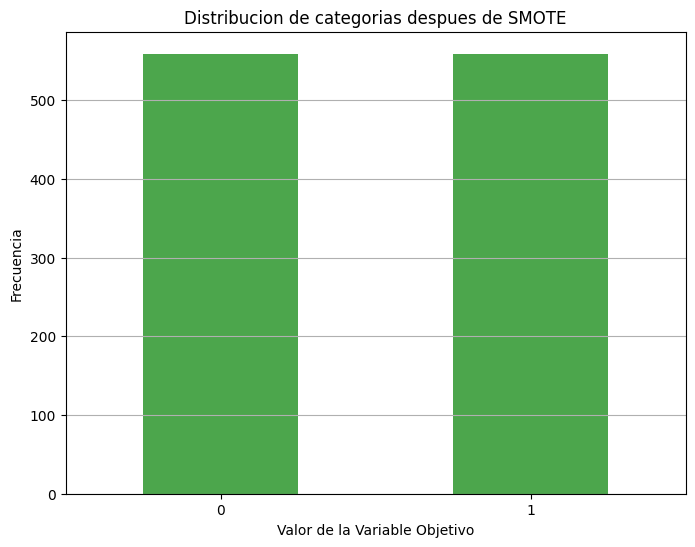

In [381]:
plt.figure(figsize=(8, 6))
y_trainval_resampled.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Valor de la Variable Objetivo')
plt.ylabel('Frecuencia')
plt.title('Distribucion de categorias despues de SMOTE')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')
plt.show()

### IMPLEMENTACION DE MODELOS DE ML

In [562]:
predictions=pd.DataFrame()
metrics=pd.DataFrame()

In [382]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc
from sklearn.metrics import precision_score, recall_score,roc_auc_score,f1_score

Para esta implementación usaremos Pipeline y GridSearch en todos los modelos (excep Naive Bayes), adicionalmente almacenaremos los resultados de las predicciones en el dataset `Predictions` y las métricas de evaluación en el dataset `metricas`. 

Realizaremos una matriz de confusión y curva ROC para cada uno de los modelos.

*La Precision* es la métrica de negocio en la que nos enfocaremos, ya que garantiza que no sobreestimemos la cantidad de estudiantes que se matricularán. Los falsos positivos tendrían un impacto muy grave en la gestion comercial y las decisiones financieras de la institución, mientras que los falsos negativos representarían, de hecho, ganancias fuera de lo esperado.



#### REGRESION LOGÍSTICA

In [548]:
model='LogReg' #Esto es para la tabla final de metricas
lr = LogisticRegression()
escaler= StandardScaler()
param_grid = {'lr__C': [0.001, 0.1, 1, 3],
              'lr__solver':['lbfgs', 'liblinear']}
pipe = Pipeline([('escaler', escaler ), ('lr',lr)])
grid_lr = GridSearchCV(pipe, param_grid, cv=10)

In [549]:
grid_lr.fit( X_trainval_resampled  ,y_trainval_resampled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('escaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.001, 0.1, 1, 3],
                         'lr__solver': ['lbfgs', 'liblinear']})

In [550]:
print("Best params:\n{}\n".format(grid_lr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lr.best_score_))
print("Test-set score: {:.2f}".format(grid_lr.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid_lr.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'lr__C': 1, 'lr__solver': 'lbfgs'}

Best cross-validation score: 0.75
Test-set score: 0.70
Train-set score: 0.84


In [563]:
from sklearn.metrics import accuracy_score


predictions['LogReg']=grid_lr.predict(X_test)
y_pred=predictions.LogReg
y_score=grid_lr.predict_proba(X_test)[:, 1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred)
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)
accuracy= accuracy_score(y_true=y_test, y_pred=y_pred)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,accuracy,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','accuracy', 'recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

,precission,accuracy,recall,f1_score,auc_score
LogReg,0.617886,0.698052,0.622951,0.620408,0.758593


In [460]:
def confusion_matriz(cm):
    labels = ['Clase {}'.format(i) for i in range(cm.shape[0])]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Verdaderos')
    plt.title('Matriz de Confusión Modelo')
    plt.show()

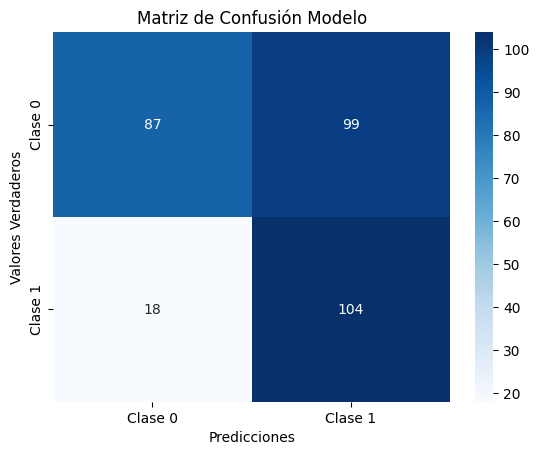

In [491]:
cm_lr= confusion_matriz(cm)

In [462]:
report1=classification_report(y_true=y_test, y_pred=y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       186
           1       0.62      0.62      0.62       122

    accuracy                           0.70       308
   macro avg       0.68      0.69      0.68       308
weighted avg       0.70      0.70      0.70       308



In [463]:
def grafico_curvaROC (fpr, tpr,roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

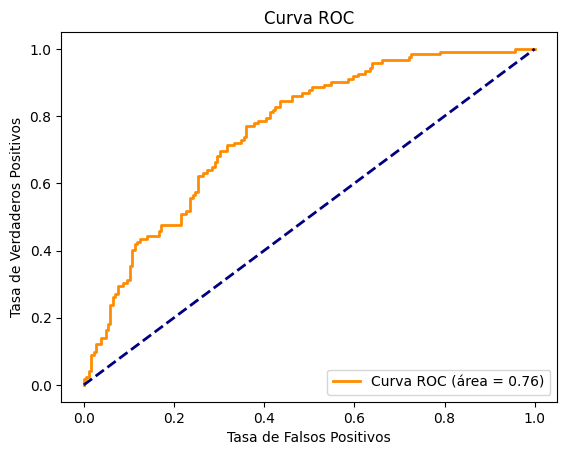

In [492]:
graficoROC_lr= grafico_curvaROC(fpr,tpr,roc_auc)

#### RANDOM FOREST CLASSIFIER

In [565]:
from sklearn.ensemble import RandomForestClassifier

In [566]:
model='RANDOM_FOREST' #Esto es para la tabla final de metricas
rf = RandomForestClassifier()
param_grid = {'max_depth': ['None', 20, 50],
              'n_estimators':[50, 100, 200]}
grid_rf = GridSearchCV(rf, param_grid, cv=10)

In [567]:
grid_rf.fit( X_trainval_resampled ,y_trainval_resampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': ['None', 20, 50],
                         'n_estimators': [50, 100, 200]})

In [568]:
print("Best params:\n{}\n".format(grid_rf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_rf.best_score_))
print("Test-set score: {:.2f}".format(grid_rf.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid_rf.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'max_depth': 20, 'n_estimators': 200}

Best cross-validation score: 0.76
Test-set score: 0.68
Train-set score: 1.00


In [569]:
predictions['RandomForest']=grid_rf.predict(X_test)
y_pred=predictions.RandomForest
y_score=grid_lr.predict_proba(X_test)[:, 1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred)
fscore=f1_score(y_true=y_test, y_pred=y_pred)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,accuracy,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','accuracy', 'recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

,precission,accuracy,recall,f1_score,auc_score
LogReg,0.595041,0.678571,0.590164,0.592593,0.758593
RANDOM_FOREST,0.588710,0.675325,0.598361,0.593496,0.758593


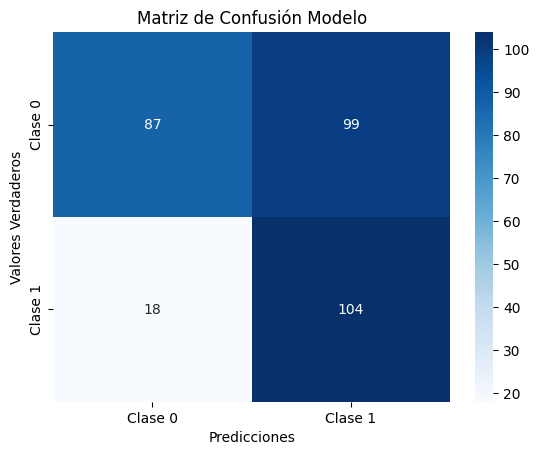

In [495]:
cm_rf=confusion_matriz(cm)

In [570]:
report_rf=classification_report(y_true=y_test, y_pred=y_pred)
print(report_rf)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       186
           1       0.59      0.60      0.59       122

    accuracy                           0.68       308
   macro avg       0.66      0.66      0.66       308
weighted avg       0.68      0.68      0.68       308



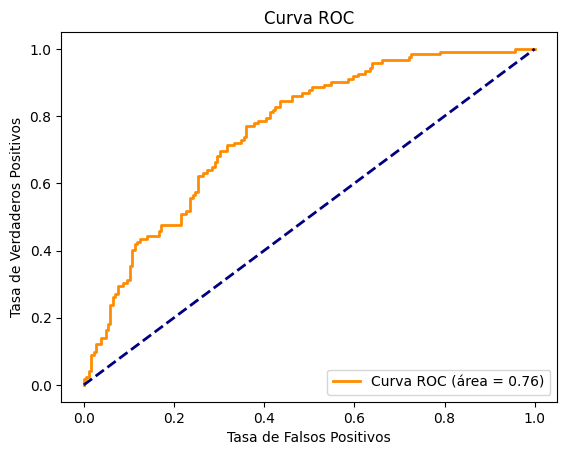

In [571]:
graficoROC_rf=grafico_curvaROC(fpr,tpr,roc_auc)

#### SUPPORT VECTOR MACHINE

In [588]:
from sklearn.svm import SVC

In [589]:
model='SVM' #Esto es para la tabla final de metricas
svc = SVC()
escaler= StandardScaler()
param_grid = {'svc__C': [0.001, 0.01, 1],
              'svc__gamma':['scale', 'auto'],
              'svc__kernel':['linear', 'rbf']}
pipe=Pipeline([('escaler', escaler ), ('svc',svc)])
grid_svc = GridSearchCV(pipe, param_grid, cv=10)

In [590]:
grid_svc.fit( X_trainval_resampled ,y_trainval_resampled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('escaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 1],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']})

In [591]:
print("Best params:\n{}\n".format(grid_svc.best_estimator_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Test-set score: {:.2f}".format(grid_svc.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid_svc.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
Pipeline(steps=[('escaler', StandardScaler()), ('svc', SVC(C=1))])

Best cross-validation score: 0.73
Test-set score: 0.68
Train-set score: 0.91


In [592]:
predictions['SVC']=grid_svc.predict(X_test)
y_pred=predictions.SVC
y_score=grid_svc.decision_function(X_test)
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred)
fscore=f1_score(y_true=y_test, y_pred=y_pred)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,accuracy,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','accuracy', 'recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

,precission,accuracy,recall,f1_score,auc_score
LogReg,0.595041,0.678571,0.590164,0.592593,0.758593
RANDOM_FOREST,0.588710,0.675325,0.598361,0.593496,0.758593
SVM,0.629213,0.678571,0.459016,0.530806,0.732725
NaiveBayes,0.512315,0.620130,0.852459,0.640000,0.758593


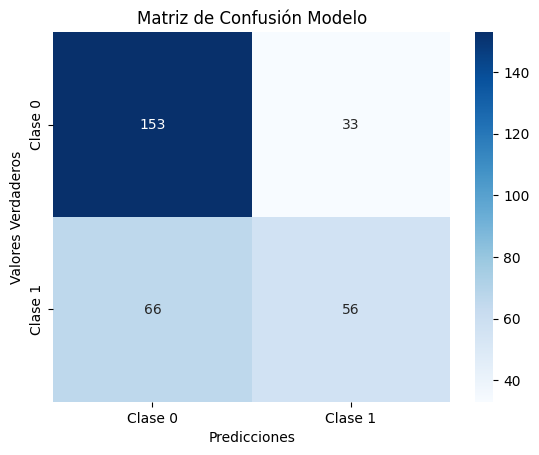

In [478]:
cm_svc=confusion_matriz(cm)

In [479]:
report_svc=classification_report(y_true=y_test, y_pred=y_pred)
print(report_svc)

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       186
           1       0.63      0.46      0.53       122

    accuracy                           0.68       308
   macro avg       0.66      0.64      0.64       308
weighted avg       0.67      0.68      0.67       308



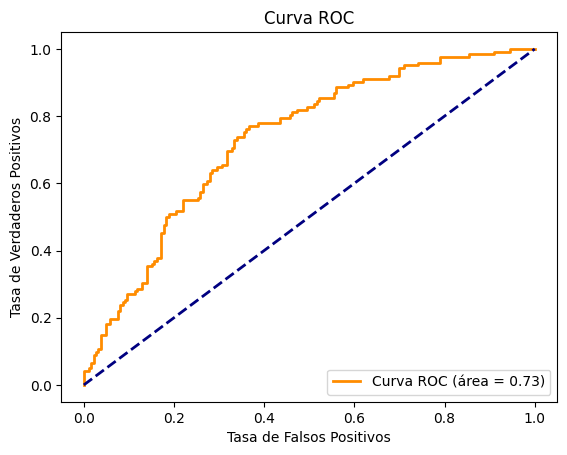

In [480]:
graficoROC_svc=grafico_curvaROC(fpr,tpr,roc_auc)

#### NAIVE BAYES

In [481]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [584]:
model='NaiveBayes' #Esto es para la tabla final de metricas
nb= GaussianNB()
score_cv= cross_val_score(nb, X_trainval_resampled,y_trainval_resampled,cv=10, scoring='accuracy' )


In [585]:
nb.fit(X_trainval_resampled,y_trainval_resampled)

GaussianNB()

In [586]:
print("Test-set score: {:.2f}".format(nb.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(nb.score(X_trainval_resampled, y_trainval_resampled)))

Test-set score: 0.62
Train-set score: 0.66


In [587]:
predictions['NaiveBayes']=nb.predict(X_test)
y_pred=predictions.NaiveBayes
y_score=grid_lr.predict_proba(X_test)[:, 1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred)
fscore=f1_score(y_true=y_test, y_pred=y_pred)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,accuracy,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','accuracy', 'recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

,precission,accuracy,recall,f1_score,auc_score
LogReg,0.595041,0.678571,0.590164,0.592593,0.758593
RANDOM_FOREST,0.588710,0.675325,0.598361,0.593496,0.758593
SVM,0.512315,0.620130,0.852459,0.640000,0.758593
NaiveBayes,0.512315,0.620130,0.852459,0.640000,0.758593


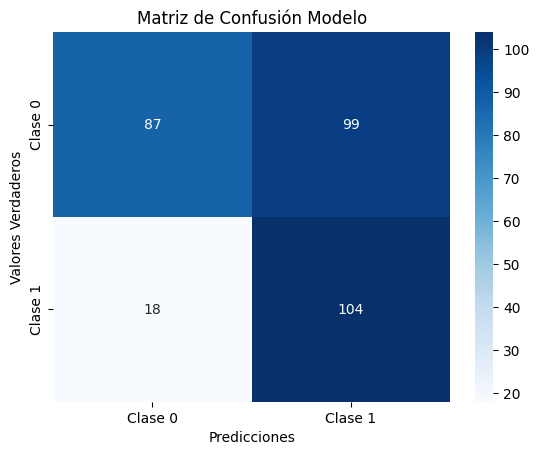

In [486]:
cn_nb=confusion_matriz(cm)

In [487]:
report_nb=classification_report(y_true=y_test, y_pred=y_pred)
print(report_nb)    

              precision    recall  f1-score   support

           0       0.83      0.47      0.60       186
           1       0.51      0.85      0.64       122

    accuracy                           0.62       308
   macro avg       0.67      0.66      0.62       308
weighted avg       0.70      0.62      0.61       308



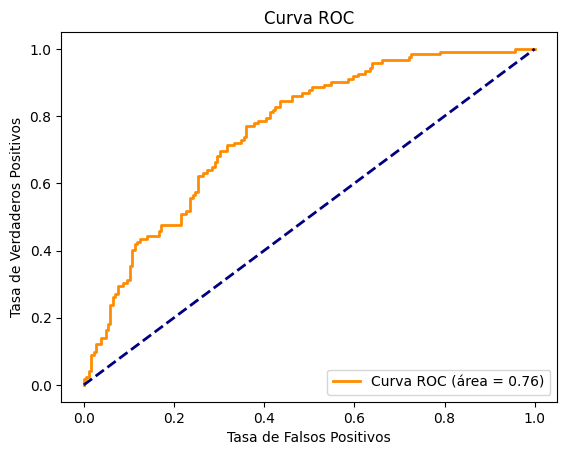

In [488]:
graficoROC_nb=grafico_curvaROC(fpr,tpr,roc_auc)

### ALGORITMO GENETICO PARA MEJORAR LA PRECISION (DISMINUIR LOS FALSOS POSITIVOS)

#### ALGORITMOS GENÉTICOS - BASE CONCEPTUAL
---

* Se usan para resolver problemas np (no polinomiales)
* Se basan en el principio de Darwin, `La supervivencia del mas fuerte`

* Cuando dos hay cruce de individuos, el gen mas fuerte, sobrevivie.

* Cromosomas, Genes y alelos.

* Se busca que sean binarios.

* Conjunto de cromosomas se asocian a una población.

* El fitnes, funcion de evaluacion. Que tan fuerte es un cromosoma y que tan propenso es permanecer.

    * Obtienes la propabilidad de reproducción de cada cromosoma.

* La tarea es cruzar cromosomas y general nuevo material genético, e insertar una tasa de mutación.

* La descendencia mutada se llama D y es una nueva población.

* Las iteraciones se llaman Generaciones.

** PARÁMETROS**

  * Fitness
  * Probabilidad de Cruce 0 - 100%
        Tipicamente entre 0.6 y 0.9

  * Probabilidad de mutación

        1/tamaño P - 1/len_Cromosoma

      Ideal que sean pequeños.

** CRITERIOS DE DETERMINACION**

  * Numero de Generaciones
  * Alcance del óptimo
  * Ausencia de mejora luego de varias generaciones.
  * Tiempo de computo fijo

#### PROBANDO GA EN MODELO SVC

In [207]:
from sklearn.metrics import make_scorer, recall_score

# Función de aptitud (fitness function)
def fitness_function(y_true, y_pred):
    return precision_score(y_true, y_pred, average='weighted')

# Función para evaluar un modelo con hiperparámetros dados
def evaluate_model(params, X, y):
    model = SVC(**params)  # Crea un modelo SVC con los hiperparámetros dados
    score = np.mean(cross_val_score(model, X, y, cv=10, scoring=make_scorer(fitness_function)))
    return score

# Algoritmo genético para optimización de hiperparámetros
def genetic_algorithm(X, y, parameter_space, generations=100, population_size=20):
    population = []

    for _ in range(population_size):
        params = {key: np.random.choice(values) for key, values in parameter_space.items()}
        fitness = evaluate_model(params, X, y)
        population.append((params, fitness))

    for generation in range(generations):
        # Seleccionar padres (50% de los mejores)
        parents = [x for x in sorted(population, key=lambda x: x[1], reverse=True)[:population_size // 2]]

        # Cruzar padres para generar hijos
        children = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            crossover_point = np.random.randint(1, len(parent1[0]))
            child_params = {key: parent1[0][key] if idx < crossover_point else parent2[0][key]
                            for idx, key in enumerate(parameter_space.keys())}
            mutation_prob = 0.2  # Probabilidad de mutación
            if np.random.rand() < mutation_prob:
                mutated_param = np.random.choice(list(parameter_space.keys()))
                child_params[mutated_param] = np.random.choice(parameter_space[mutated_param])
            fitness = evaluate_model(child_params, X, y)
            children.append((child_params, fitness))

        # Reemplazar la población anterior con la nueva generación
        population = parents + children

    # Devolver el mejor modelo encontrado
    best_params, _ = max(population, key=lambda x: x[1])
    best_model = SVC(**best_params)
    return best_model

# Definir el espacio de búsqueda de hiperparámetros
parameter_space = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}






In [208]:
# Llamar a la función del algoritmo genético
best_model = genetic_algorithm(X_trainval_resampled, y_trainval_resampled, parameter_space, generations=100, population_size=20)

In [504]:
best_model.fit(X_trainval_resampled,y_trainval_resampled)

SVC(kernel='linear')

In [505]:
print(" Parametros de este modelo: ", "Kernel: ",  best_model.kernel, "Regularizacion: ",  best_model.C, "Gamma: ", best_model.gamma)
print("Test-set score: {:.2f}".format(best_model.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(best_model.score(X_trainval_resampled, y_trainval_resampled)))

 Parametros de este modelo:  Kernel:  linear Regularizacion:  1.0 Gamma:  scale
Test-set score: 0.67
Train-set score: 0.83


In [509]:
# Después de entrenar tu modelo
coeficientes = best_model.coef_

# Asociar los coeficientes con los nombres de las características
nombres_caracteristicas = X_trainval_resampled.columns  # Asumiendo que estás utilizando un DataFrame de pandas
coeficientes_por_caracteristica = list(zip(nombres_caracteristicas, coeficientes[0]))

# Mostrar los coeficientes ordenados por importancia
coeficientes_por_caracteristica.sort(key=lambda x: abs(x[1]), reverse=True)
print("Variables más influyentes:")
print(coeficientes_por_caracteristica)


Variables más influyentes:
[('TASA_20232.0', -1.7927779599682383), ('BECADO_GOB_Y', 1.6129352613618828), ('DESC_BACHILLERATO_I.E.D. Alexander Von Humboldt', -1.5670173028511007), ('GRUPO_ETNICO_otro', 1.5625260592477894), ('MES_DECISION_otro', -1.527671263558808), ('DESC_DECISION_No admitido(a)', -1.443292111326347), ('IND_ACEPTADA_Y', 1.4219405977875854), ('MES_SOLICITUD_January', -1.3430371640907295), ('EDAD_25.0', -1.334716905940594), ('DESC_DPTO1_otro', -1.262941212361758), ('DESC_DPTO1_Magdalena', -1.255979353591563), ('TASA_20201.0', -1.1799317400634934), ('ATRIBUTOS_CRIX - Crédito Icetex', 1.1437788367966002), ('ATRIBUTOS_BEOC - Beca Orgullo Caribe', -1.123423419477505), ('DESC_MUNICIPIO1_MONTERIA (Cord)', -1.1019452629284432), ('MES_DECISION_December', -1.077663748854313), ('ATRIBUTOS_BERA - Beca Roble Amarillo', -1.06088108173984), ('ESTRATO_5.0', 1.0564137883048503), ('DESC_DPTO1_Cesar', -1.046782351521136), ('CIUDAD_BACHILLERATO_Cartagena', -1.038111983732318), ('CIUDAD_NACI

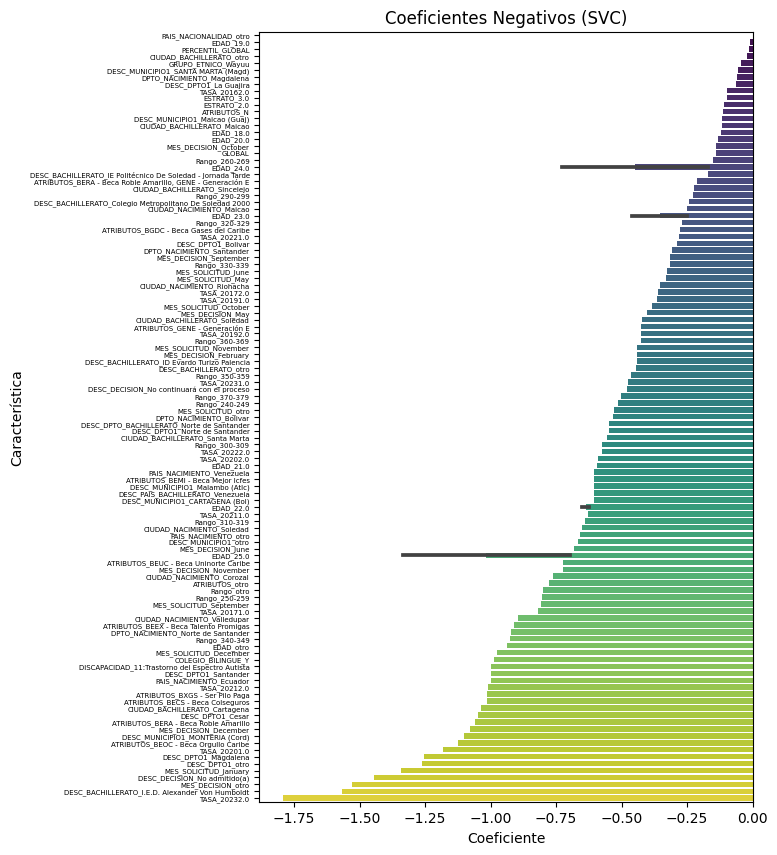

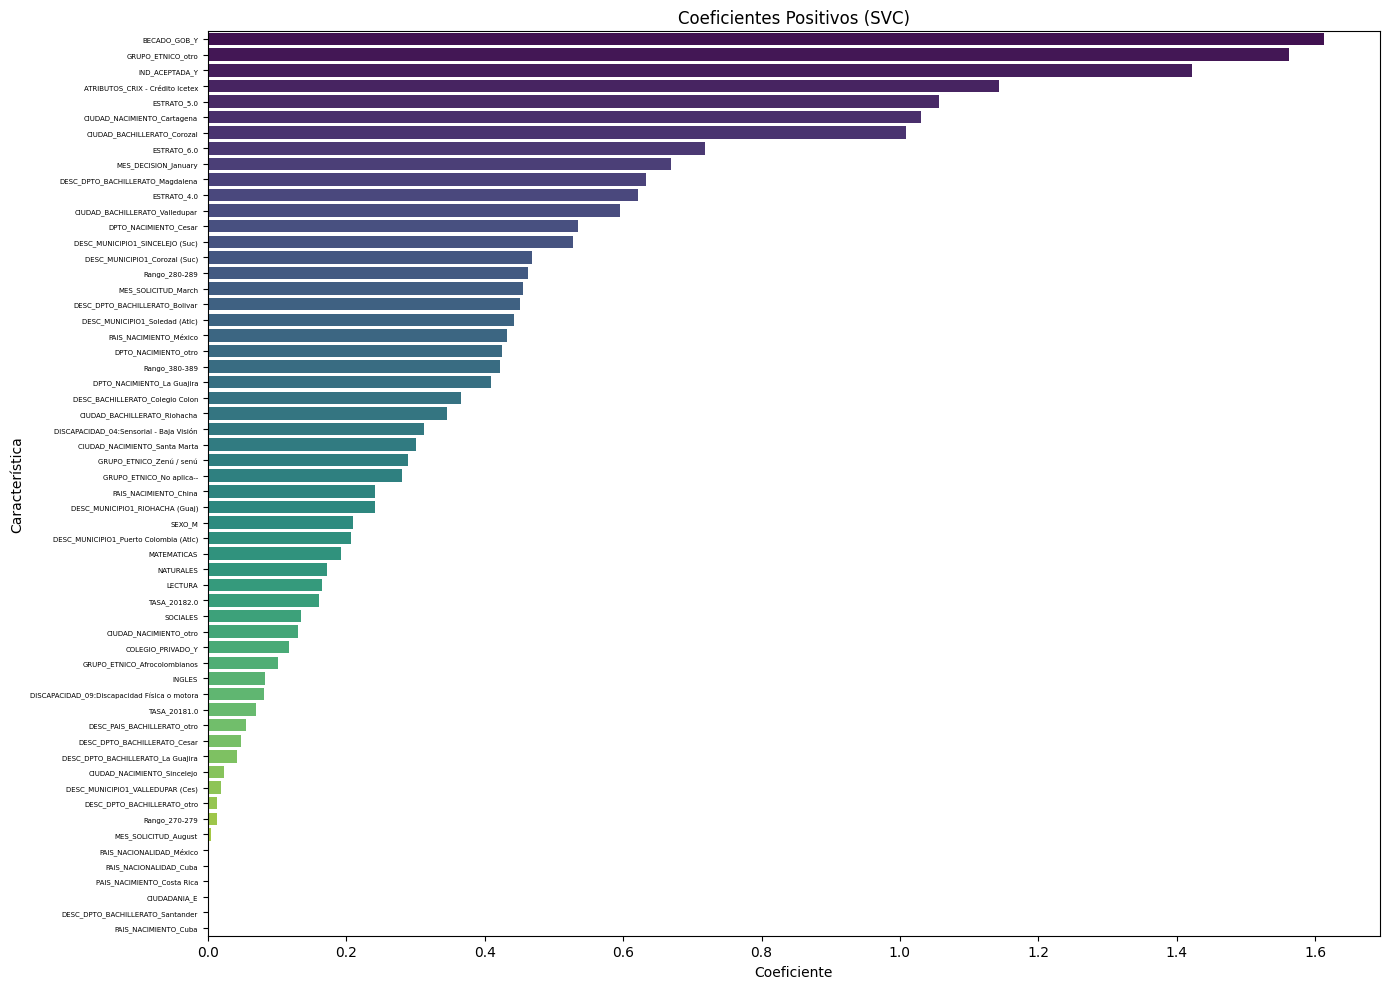

In [528]:

# Obtener los coeficientes (pesos) de las características
coeficientes = best_model.coef_.ravel()

# Obtener los nombres de las características
nombres_caracteristicas = X_trainval_resampled.columns

# Crear un DataFrame para facilitar la visualización
coeficientes_df_lr = pd.DataFrame({'Característica': nombres_caracteristicas, 'Coeficiente': coeficientes})
coeficientes_df_lr = coeficientes_df_lr.sort_values(by='Coeficiente', ascending=False)

# Filtrar coeficientes negativos y positivos
coeficientes_negativos = coeficientes_df_lr[coeficientes_df_lr['Coeficiente'] < 0]
coeficientes_positivos = coeficientes_df_lr[coeficientes_df_lr['Coeficiente'] >= 0]

# Crear gráficos de barras para coeficientes negativos y positivos
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
sns.barplot(x='Coeficiente', y='Característica', data=coeficientes_negativos, palette='viridis')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Coeficientes Negativos (SVC)')
plt.yticks(fontsize=5) 

plt.figure(figsize=(14, 10))
sns.barplot(x='Coeficiente', y='Característica', data=coeficientes_positivos, palette='viridis')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Coeficientes Positivos (SVC)')
plt.yticks(fontsize=5)

plt.tight_layout()
plt.show()




In [594]:
predictions['GA_SVC']=best_model.predict(X_test)
y_pred=predictions.GA_SVC
y_score=grid_lr.predict_proba(X_test)[:, 1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics['GA_SVC']=[precission,accuracy,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','accuracy', 'recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

,precission,accuracy,recall,f1_score,auc_score
LogReg,0.595041,0.678571,0.590164,0.592593,0.758593
RANDOM_FOREST,0.588710,0.675325,0.598361,0.593496,0.758593
SVM,0.629213,0.678571,0.459016,0.530806,0.732725
NaiveBayes,0.512315,0.620130,0.852459,0.640000,0.758593
GA_RF,0.571429,0.662338,0.590164,0.580645,0.758593
GA_SVC,0.579832,0.665584,0.565574,0.572614,0.758593


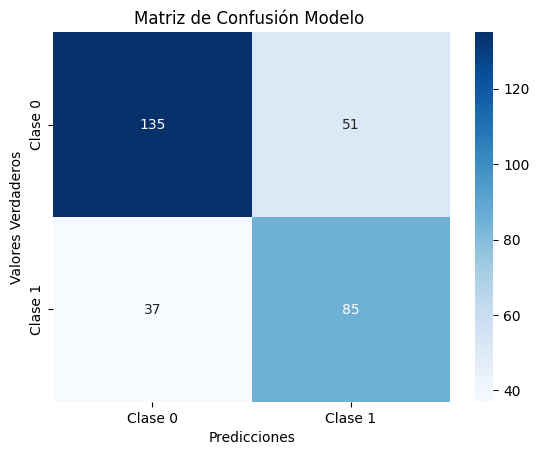

In [213]:
confusion_matriz(cm)

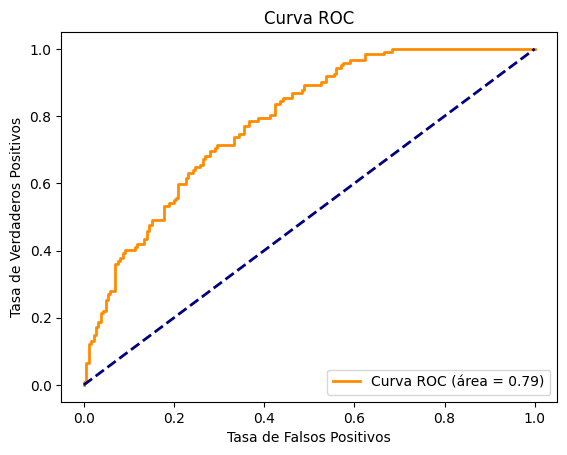

In [151]:
grafico_curvaROC(fpr,tpr,roc_auc)

#### PROBANDO GA EN MODELO RANDOM FOREST

In [195]:
from sklearn.metrics import make_scorer, recall_score

# Función de aptitud (fitness function)
def fitness_function(y_true, y_pred):
    return precision_score(y_true, y_pred, average='weighted')

# Función para evaluar un modelo con hiperparámetros dados
def evaluate_model(params, X, y):
    model = RandomForestClassifier(**params)  # Crea un modelo SVC con los hiperparámetros dados
    score = np.mean(cross_val_score(model, X, y, cv=10, scoring=make_scorer(fitness_function)))
    return score

# Algoritmo genético para optimización de hiperparámetros
def genetic_algorithm(X, y, parameter_space, generations=100, population_size=20):
    population = []

    for _ in range(population_size):
        params = {key: np.random.choice(values) for key, values in parameter_space.items()}
        fitness = evaluate_model(params, X, y)
        population.append((params, fitness))

    for generation in range(generations):
        # Seleccionar padres (50% de los mejores)
        parents = [x for x in sorted(population, key=lambda x: x[1], reverse=True)[:population_size // 2]]

        # Cruzar padres para generar hijos
        children = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            crossover_point = np.random.randint(1, len(parent1[0]))
            child_params = {key: parent1[0][key] if idx < crossover_point else parent2[0][key]
                            for idx, key in enumerate(parameter_space.keys())}
            mutation_prob = 0.2  # Probabilidad de mutación
            if np.random.rand() < mutation_prob:
                mutated_param = np.random.choice(list(parameter_space.keys()))
                child_params[mutated_param] = np.random.choice(parameter_space[mutated_param])
            fitness = evaluate_model(child_params, X, y)
            children.append((child_params, fitness))

        # Reemplazar la población anterior con la nueva generación
        population = parents + children

    # Devolver el mejor modelo encontrado
    best_params, _ = max(population, key=lambda x: x[1])
    best_model_rf = RandomForestClassifier(**best_params)
    return best_model_rf

# Definir el espacio de búsqueda de hiperparámetros
parameter_space = {
    'max_depth': [10, 20, 50],
    'n_estimators': [50, 100, 200]
}





In [197]:
best_model_rf = genetic_algorithm(X_trainval_resampled, y_trainval_resampled, parameter_space, generations=100, population_size=20)

In [511]:
best_model_rf.fit(X_trainval_resampled, y_trainval_resampled)

RandomForestClassifier(max_depth=20)

In [521]:
print("Test-set score: {:.2f}".format(best_model_rf.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(best_model_rf.score(X_trainval_resampled, y_trainval_resampled)))

Test-set score: 0.66
Train-set score: 1.00


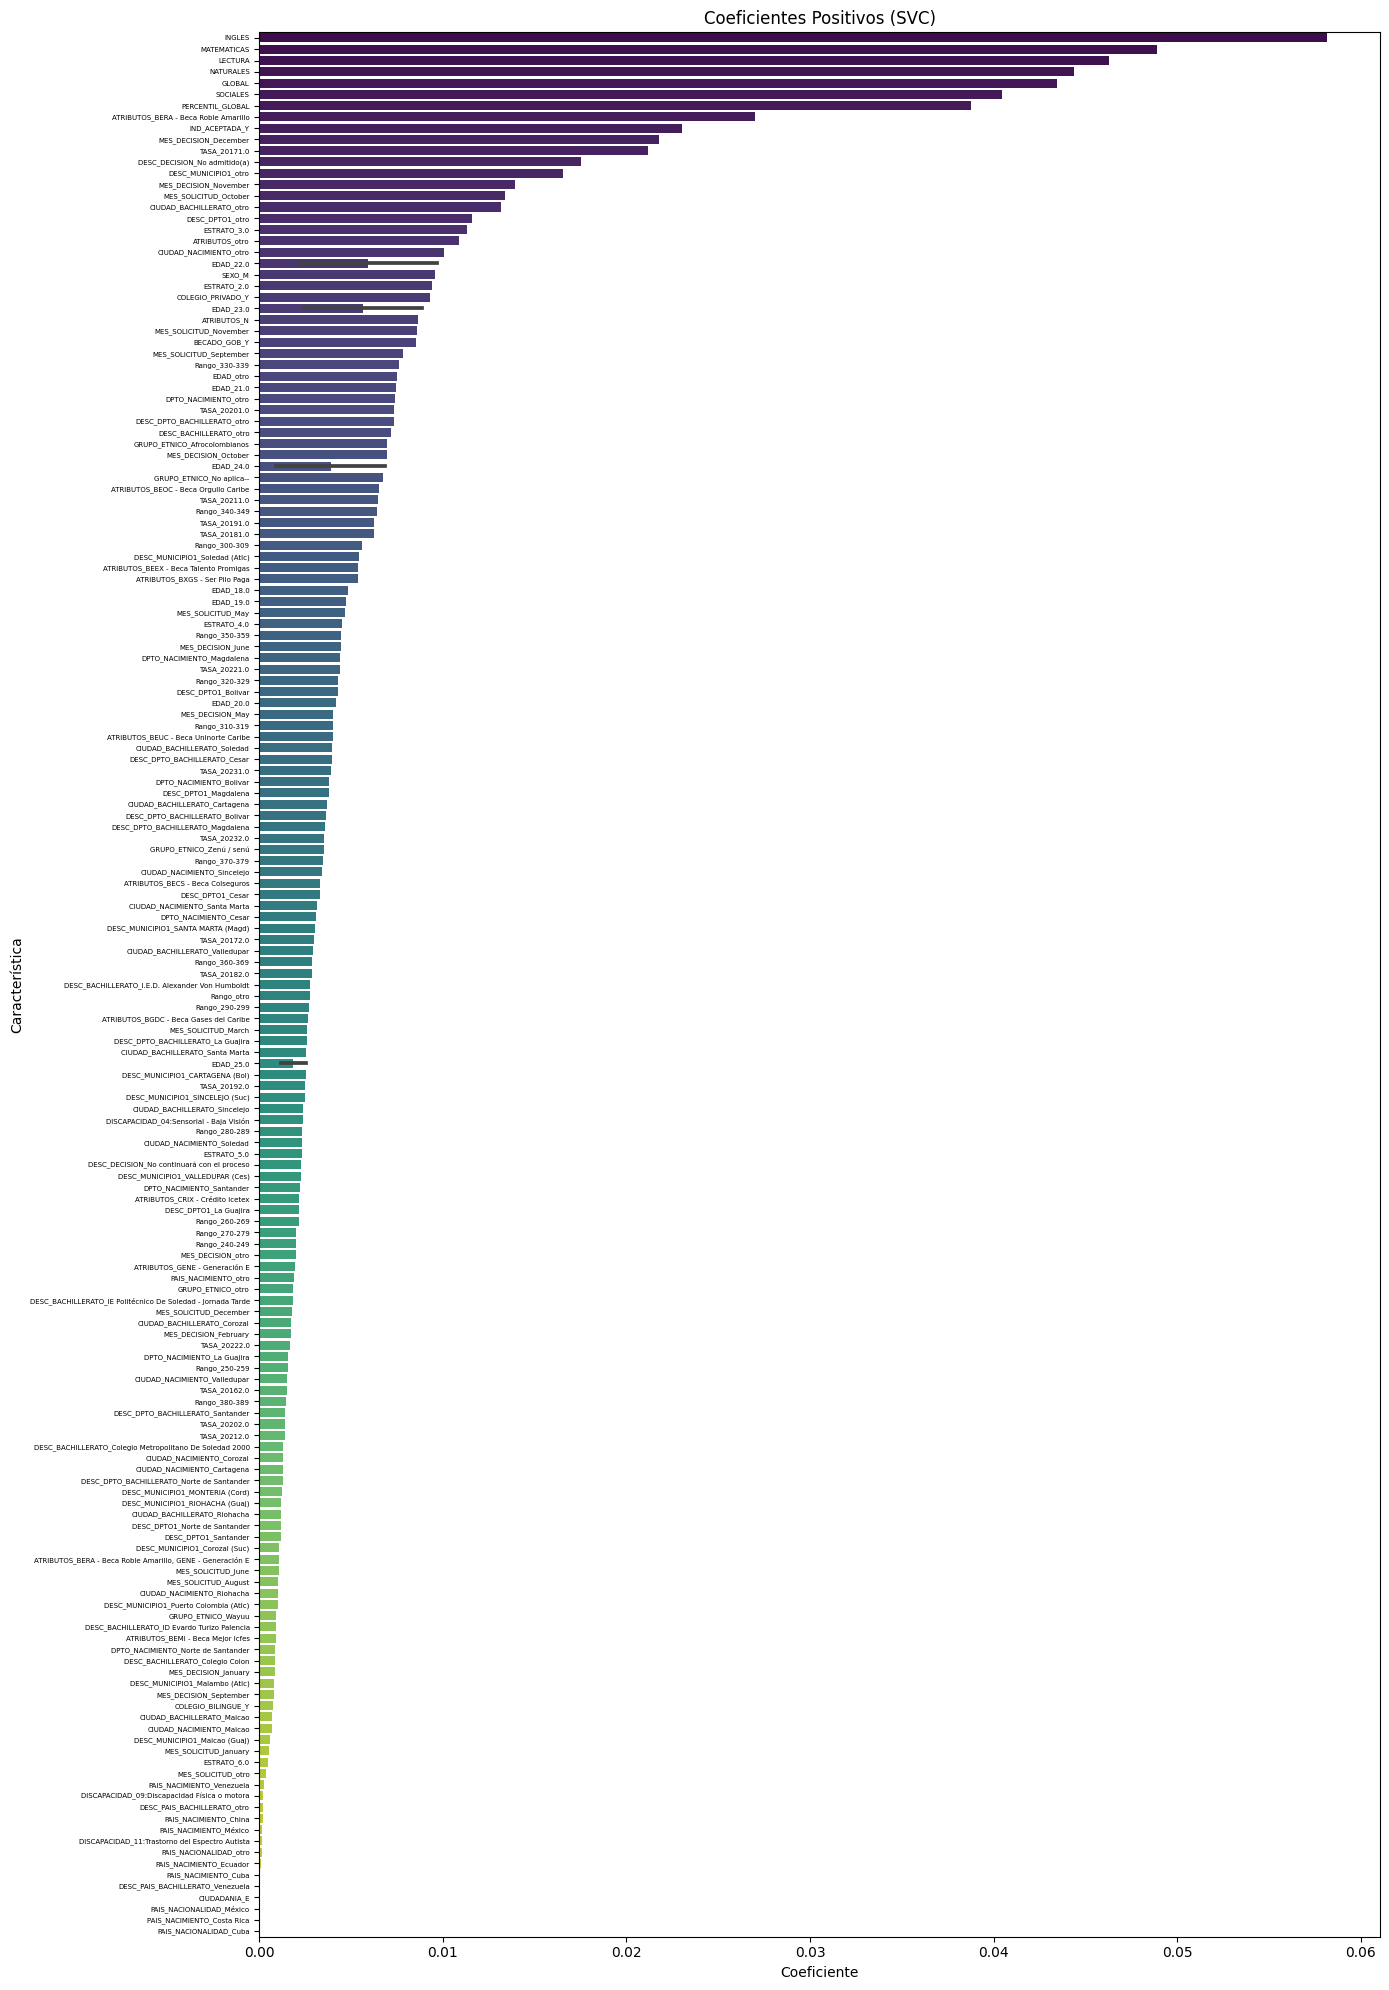

In [529]:
# Obtener los coeficientes (pesos) de las características
coeficientes = best_model_rf.feature_importances_.ravel()

# Obtener los nombres de las características
nombres_caracteristicas = X_trainval_resampled.columns

# Crear un DataFrame para facilitar la visualización
coeficientes_df_rf = pd.DataFrame({'Característica': nombres_caracteristicas, 'Coeficiente': coeficientes})
coeficientes_df_rf = coeficientes_df_rf.sort_values(by='Coeficiente', ascending=False)

# Filtrar coeficientes negativos y positivos
coeficientes_negativos = coeficientes_df_rf[coeficientes_df_rf['Coeficiente'] < 0]
coeficientes_positivos = coeficientes_df_rf[coeficientes_df_rf['Coeficiente'] >= 0]


plt.figure(figsize=(14, 20))
sns.barplot(x='Coeficiente', y='Característica', data=coeficientes_positivos, palette='viridis')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Coeficientes Positivos (SVC)')
plt.yticks(fontsize=5)

plt.tight_layout()
plt.show()

In [593]:
predictions['GA_RF']=best_model_rf.predict(X_test)
y_pred=predictions.GA_RF
y_score=grid_lr.predict_proba(X_test)[:, 1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
fscore=f1_score(y_true=y_test, y_pred=y_pred)

auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics['GA_RF']=[precission,accuracy,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','accuracy', 'recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

,precission,accuracy,recall,f1_score,auc_score
LogReg,0.595041,0.678571,0.590164,0.592593,0.758593
RANDOM_FOREST,0.588710,0.675325,0.598361,0.593496,0.758593
SVM,0.629213,0.678571,0.459016,0.530806,0.732725
NaiveBayes,0.512315,0.620130,0.852459,0.640000,0.758593
GA_RF,0.571429,0.662338,0.590164,0.580645,0.758593


In [523]:
report=classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       186
           1       0.57      0.59      0.58       122

    accuracy                           0.66       308
   macro avg       0.65      0.65      0.65       308
weighted avg       0.66      0.66      0.66       308



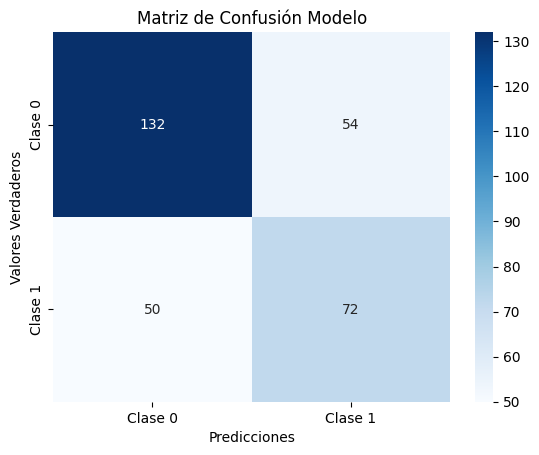

In [524]:
confusion_matriz(cm)

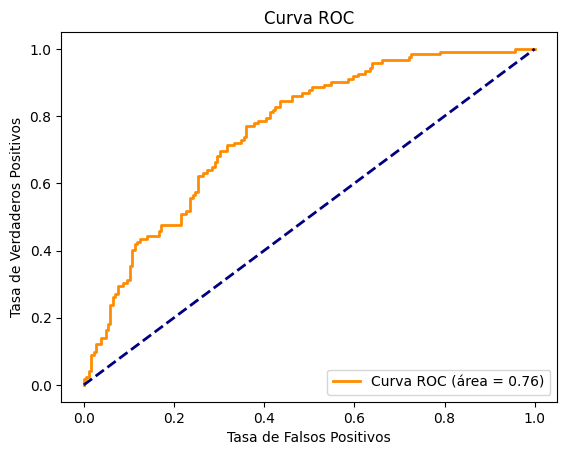

In [525]:
grafico_curvaROC(fpr,tpr,roc_auc)

### COMPARACION DE MODELOS

In [544]:
GA_SVM_positivos = coeficientes_df_lr.iloc[:10, 0]
GA_SVM_negativos = coeficientes_df_lr.iloc[-10:, 0]
GA_RandomForest = coeficientes_df_rf.iloc[:10, 0]

comparativo = pd.DataFrame({
    'GA_SVM_positivos': GA_SVM_positivos.values,
    'GA_SVM_negativos': GA_SVM_negativos.values,
    'GA_RandomForest': GA_RandomForest.values
})

# Imprimir el nuevo DataFrame
comparativo



,GA_SVM_positivos,GA_SVM_negativos,GA_RandomForest
0,BECADO_GOB_Y,ATRIBUTOS_BEOC - Beca Orgullo Caribe,INGLES
1,GRUPO_ETNICO_otro,TASA_20201.0,MATEMATICAS
2,IND_ACEPTADA_Y,DESC_DPTO1_Magdalena,LECTURA
3,ATRIBUTOS_CRIX - Crédito Icetex,DESC_DPTO1_otro,NATURALES
4,ESTRATO_5.0,EDAD_25.0,GLOBAL
5,CIUDAD_NACIMIENTO_Cartagena,MES_SOLICITUD_January,SOCIALES
6,CIUDAD_BACHILLERATO_Corozal,DESC_DECISION_No admitido(a),PERCENTIL_GLOBAL
7,ESTRATO_6.0,MES_DECISION_otro,ATRIBUTOS_BERA - Beca Roble Amarillo
8,MES_DECISION_January,DESC_BACHILLERATO_I.E.D. Alexander Von Humboldt,IND_ACEPTADA_Y
9,DESC_DPTO_BACHILLERATO_Magdalena,TASA_20232.0,MES_DECISION_December


In [545]:
metrics.T

,precission,recall,f1_score,auc_score
LogReg,0.617886,0.622951,0.620408,0.758593
RANDOM_FOREST,0.595041,0.590164,0.592593,0.758593
SVM,0.629213,0.459016,0.530806,0.732725
NaiveBayes,0.512315,0.852459,0.640000,0.758593
GA_RF,0.571429,0.590164,0.580645,0.758593
GA_SVC,0.579832,0.565574,0.572614,0.758593


## 4. CONCLUSIONES

* La data obtenida de la base de datos de universidad requiere una feature engineering mas fuerte, para hacerla idónea para los modelos de ML. Existen variables que presentan multicolinearidad, pero que son factores importantes para este estudio, y no deberíamos eliminarlas, por ejemplo los puntajes de las diferentes areas de las pruebas ICFES.

* En relación a las predicciones obtenidas por los diferentes modelos de ML, aunque presentan un valor aceptable en AUC, no son lo suficientemente buenos como para hacer planeación o tomar decisiones con ellos. En particular,ninguno de los modelos ofrece un buen rendimiento en la métrica de negocio de nuestro interés, la *precision*. De hecho muchos tienen valores cercanos al 50, lo que indica que la predicción está muy cerca de ser aleatoria. El modelo que arrojó mejor valor de precisión fué SVM.

* El algoritmo genético no parece ser efectivo para optimizar la precisión en los modelos que probamos, SVC y Ramdom Forest.

* Como opciones de mejora, propondría un feature engineering más fuerte, quizas combinado con una tecnica de reducción de dimensionalidad. Probar los modelos de ML aplicando factor de regularización tipo Lasso, también ayudaría a reducir la dimensionalidad ya que llevaría a 0 el coeficiente de  varias features. La Multicolinealidad también podría estar ingresa do ruido a los modelos.

* Las variables principales que obtuvimos con los algoritmos de GA son muy diferentes entre sí, sin embargo, llama la atención y me quedo con resultado del GA_SVC que indica que los estudiantes con mayor probabilidad de matricularse son aquellos que tienen Beca del gobierno, pertenecen a los estratos 5 o 6, terminaron su bachillerato en Corozal (sucre) y tienen creditos aprobados con el ICETEX. Esto suena mucho mas lógico y es, en efecto, real.